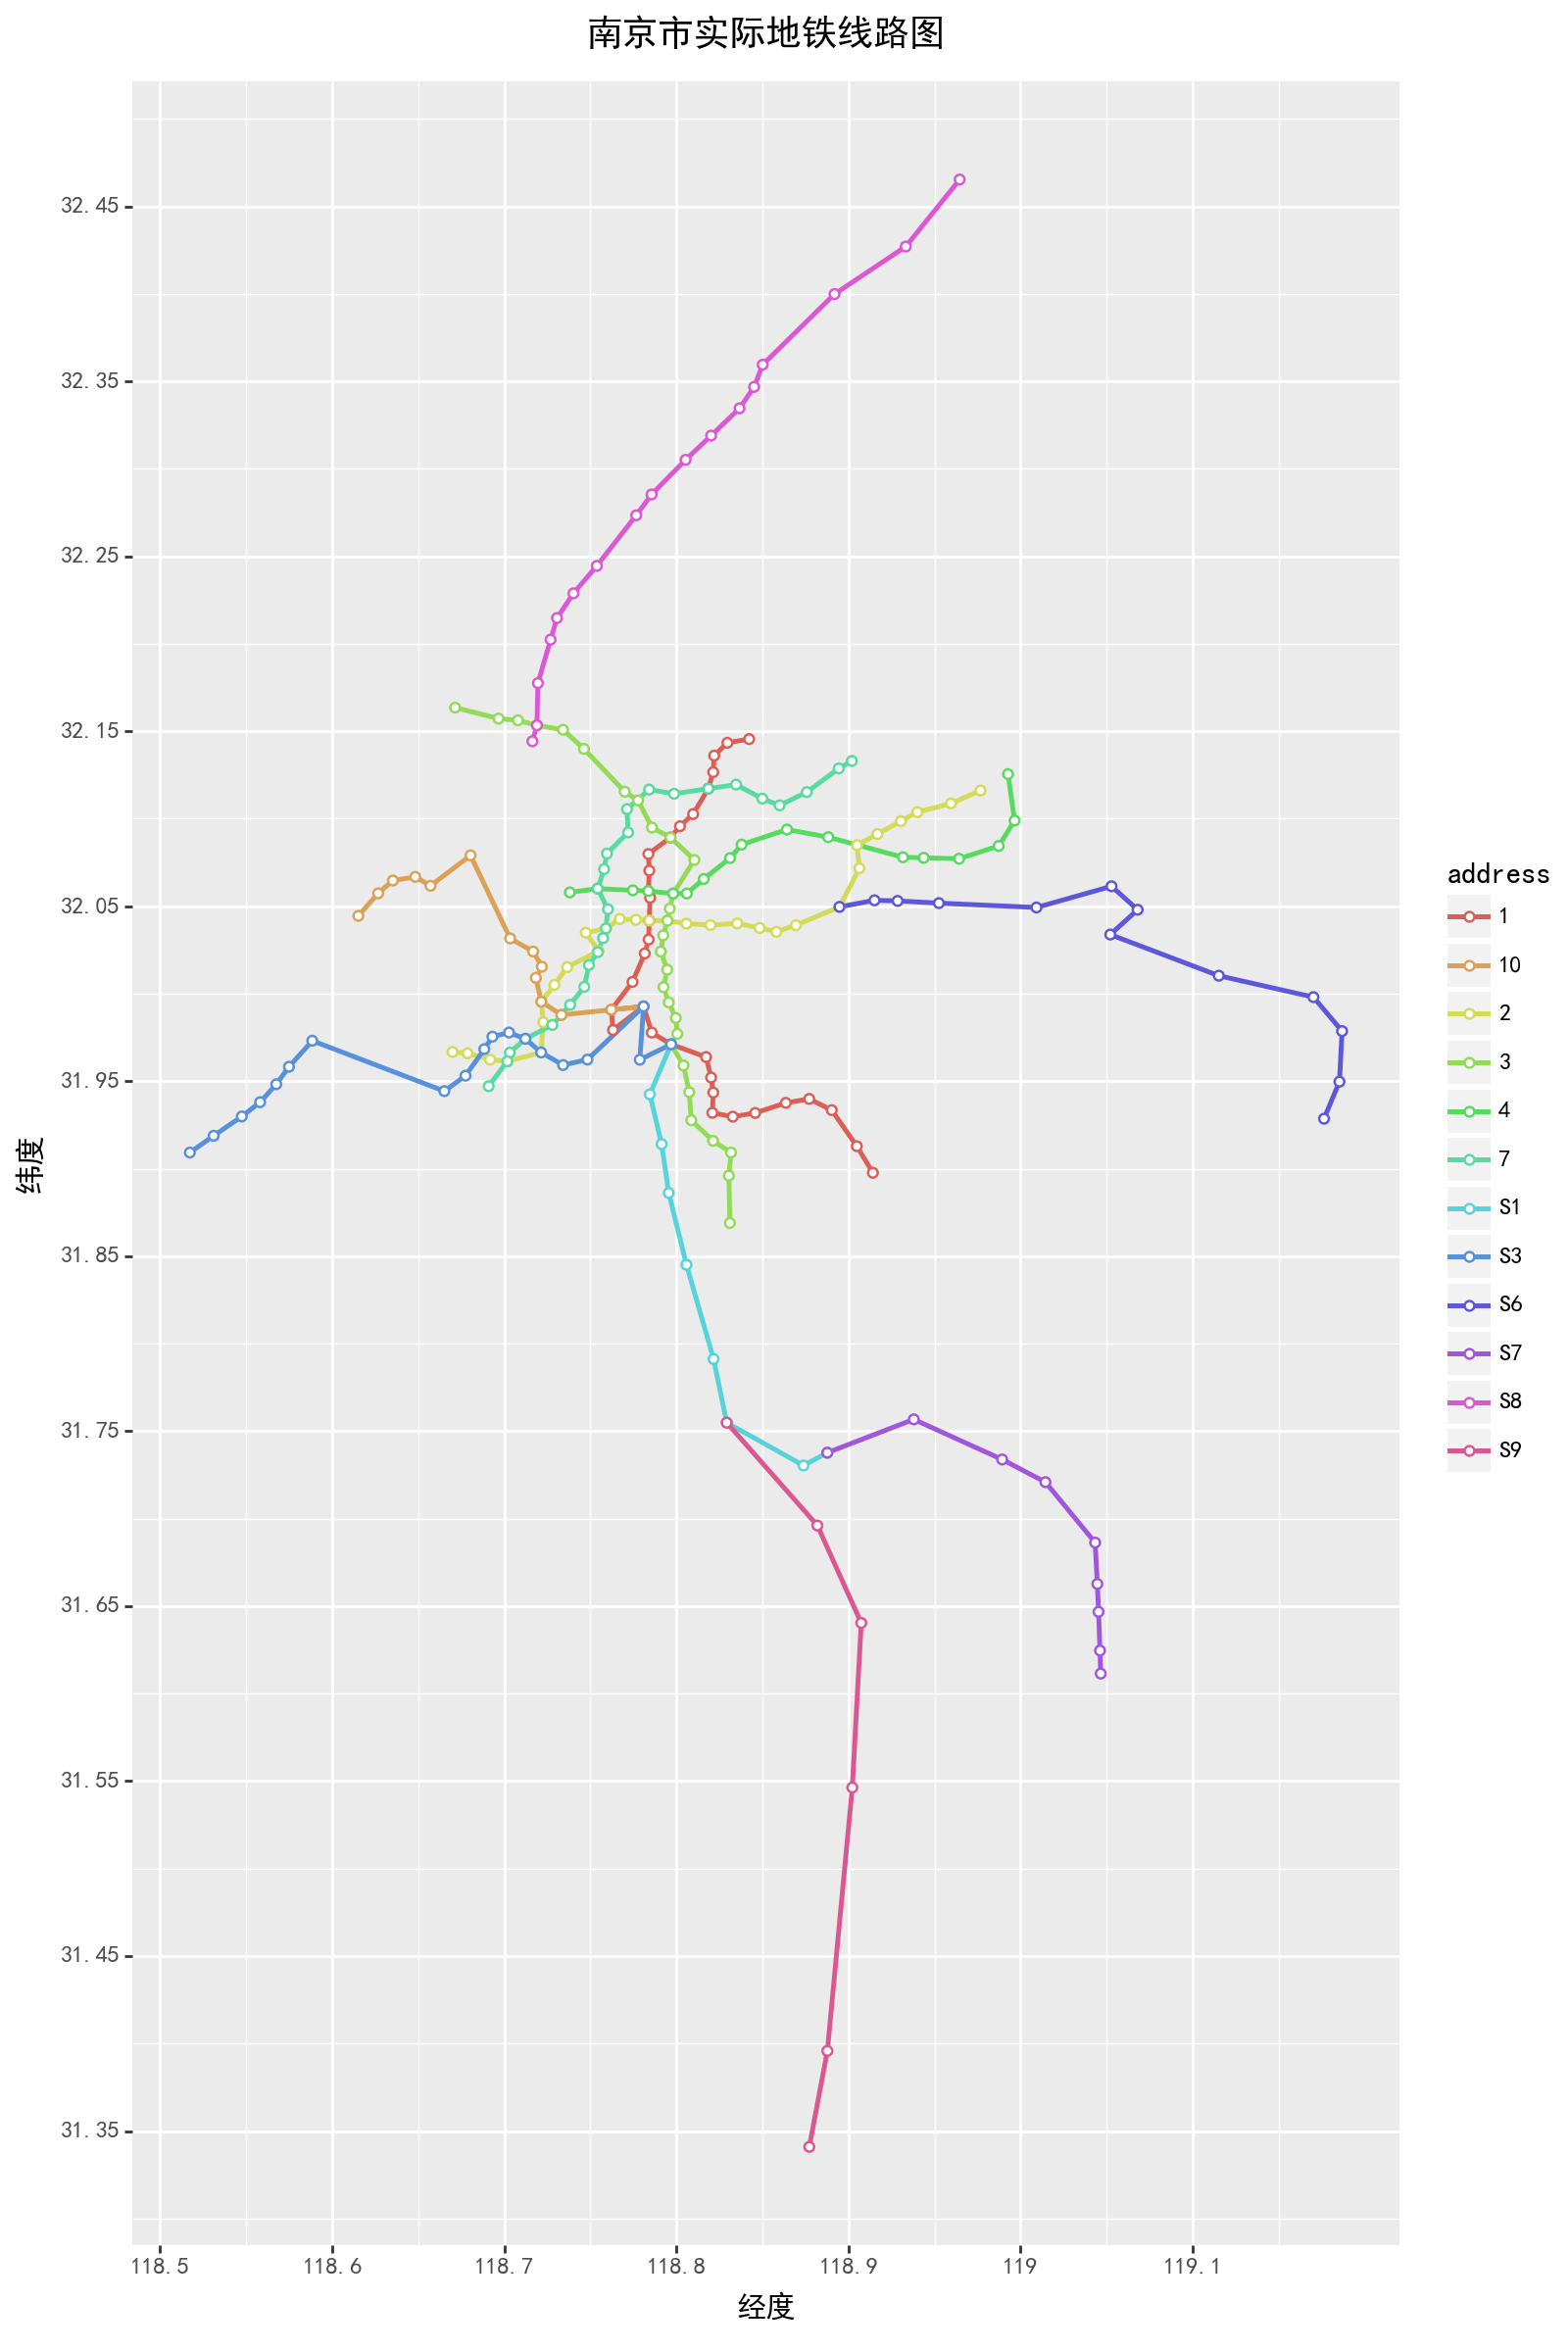

In [35]:
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置字体路径，这里以黑体为例
mpl.rcParams['font.sans-serif'] = ['SimHei', '微软雅黑']  # 尝试不同的字体
mpl.rcParams['axes.unicode_minus'] = False  # 确保负号显示正常

# 读取CSV文件
subway_data = pd.read_csv('NanJing_version1_with_coordinates.csv', encoding='utf-8-sig')

# 基础图形
base_plot = (ggplot() +
             geom_path(subway_data, aes(x='经度', y='纬度', group='address', colour='address'), size=1) +
             geom_point(subway_data, aes(x='经度', y='纬度', group='address', colour='address'), shape='o', size=1.5, fill="white") +
             xlab("经度") +
             ylab("纬度") +
             labs(title='南京市实际地铁线路图')+
             theme(text=element_text(family='SimHei'),figure_size=(8,12),plot_title=element_text(hjust=0.5))+
             scale_x_continuous(breaks=np.arange(118.4, 119.2, 0.1))+
             scale_y_continuous(breaks=np.arange(31.25, 32.50, 0.1))
              
             )


print(base_plot)


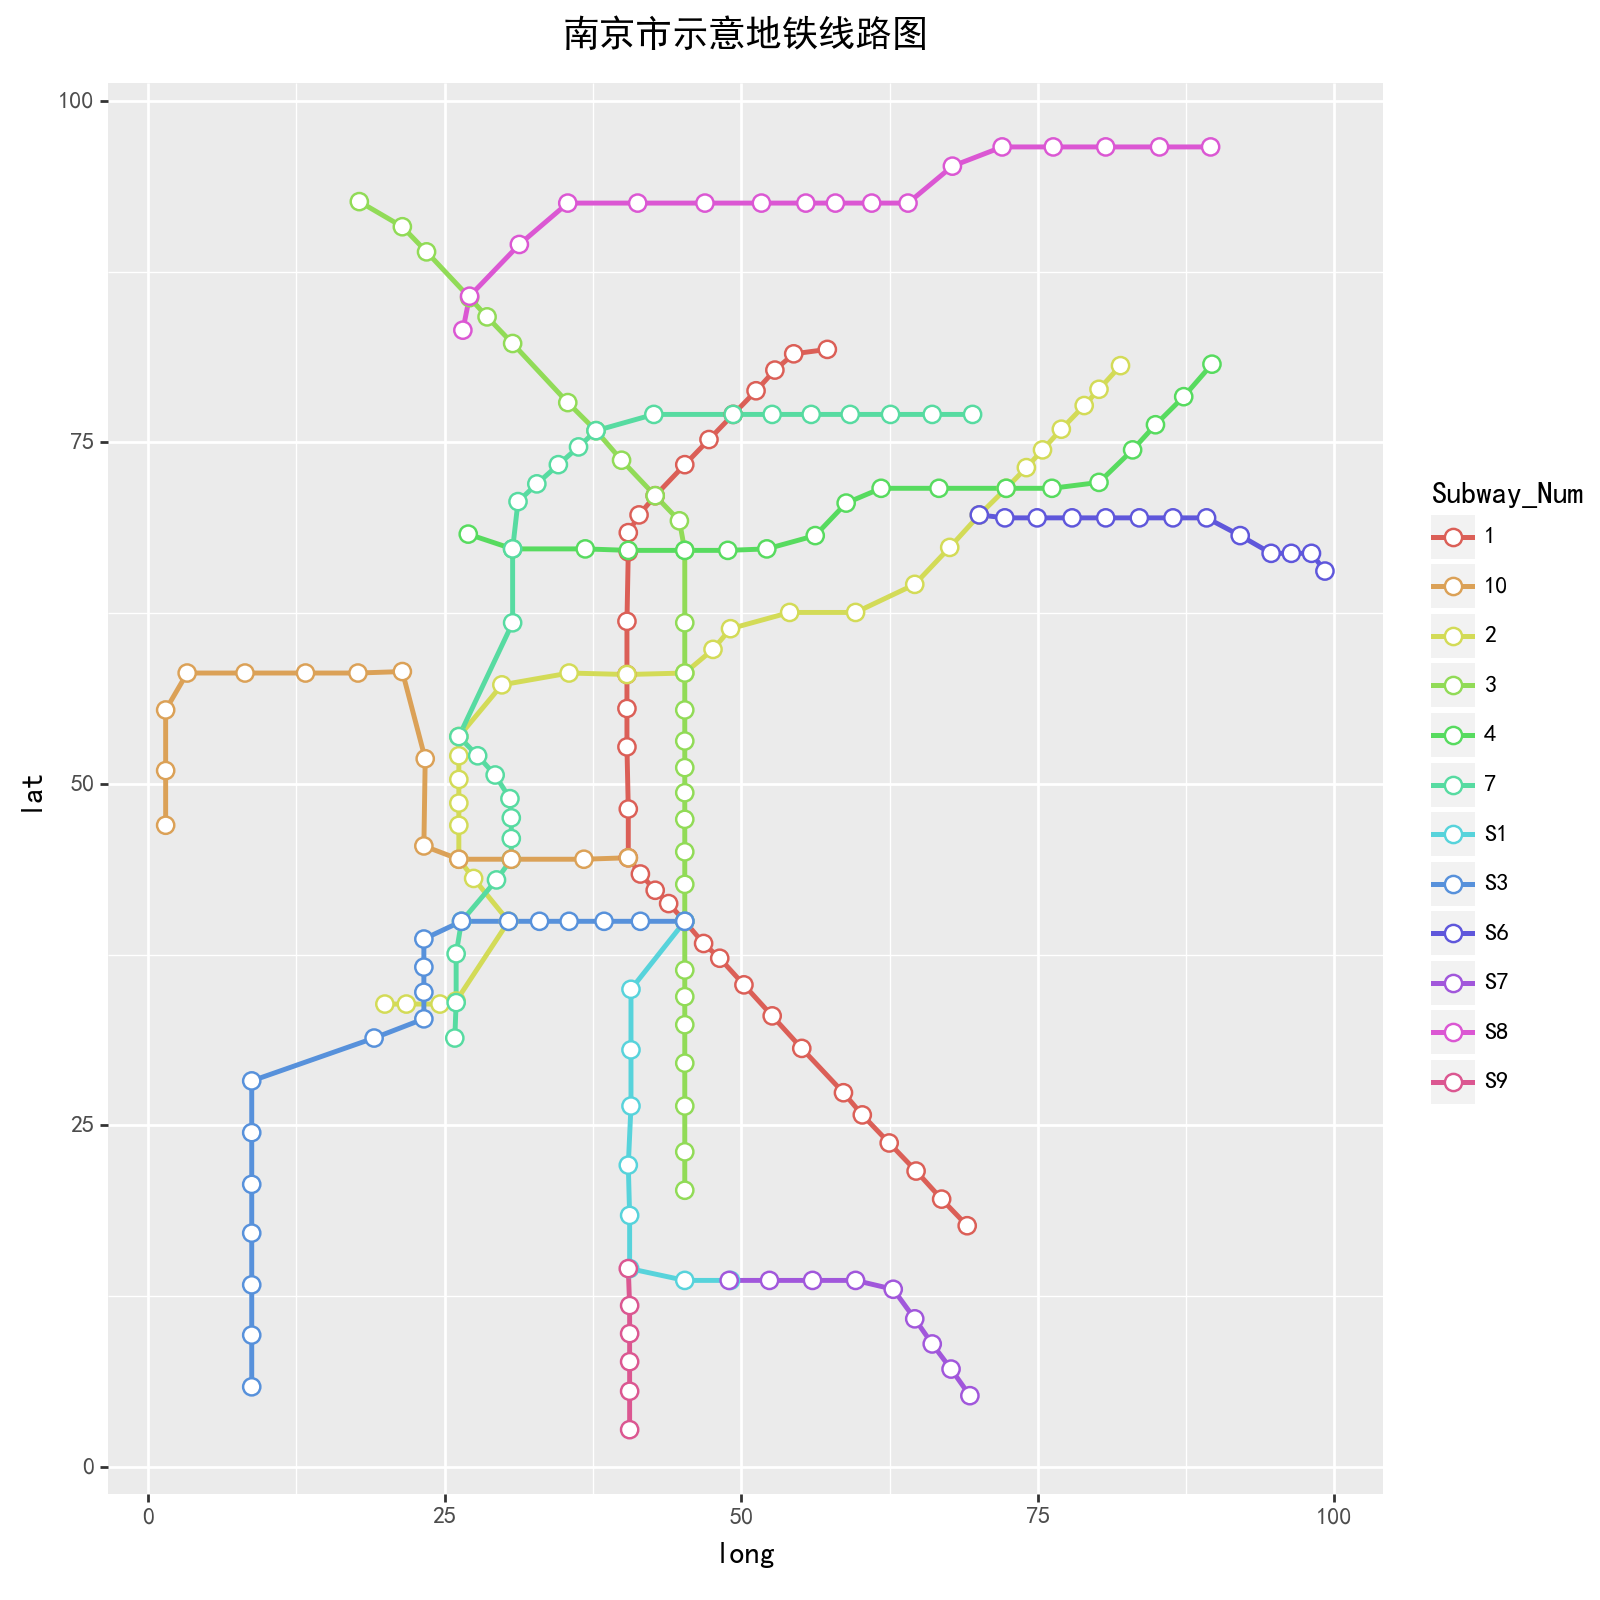

In [37]:
mydata_Path = pd.read_csv('示意地铁线路图.csv', encoding='utf-8-sig')

base_plot=(ggplot()+
  geom_path (mydata_Path,aes(x='Serise_X',y='Serise_Y',group='Subway_Num',colour='Subway_Num'), size=1)+
  geom_point(mydata_Path,aes(x='Serise_X',y='Serise_Y',group='Subway_Num',colour='Subway_Num'),shape='o',size=3,fill="white")+
  xlab("long")+
  ylab("lat")+
  labs(title='南京市示意地铁线路图')+
  theme(text=element_text(family='SimHei'),figure_size=(8,8),plot_title=element_text(hjust=0.5)))

print(base_plot)

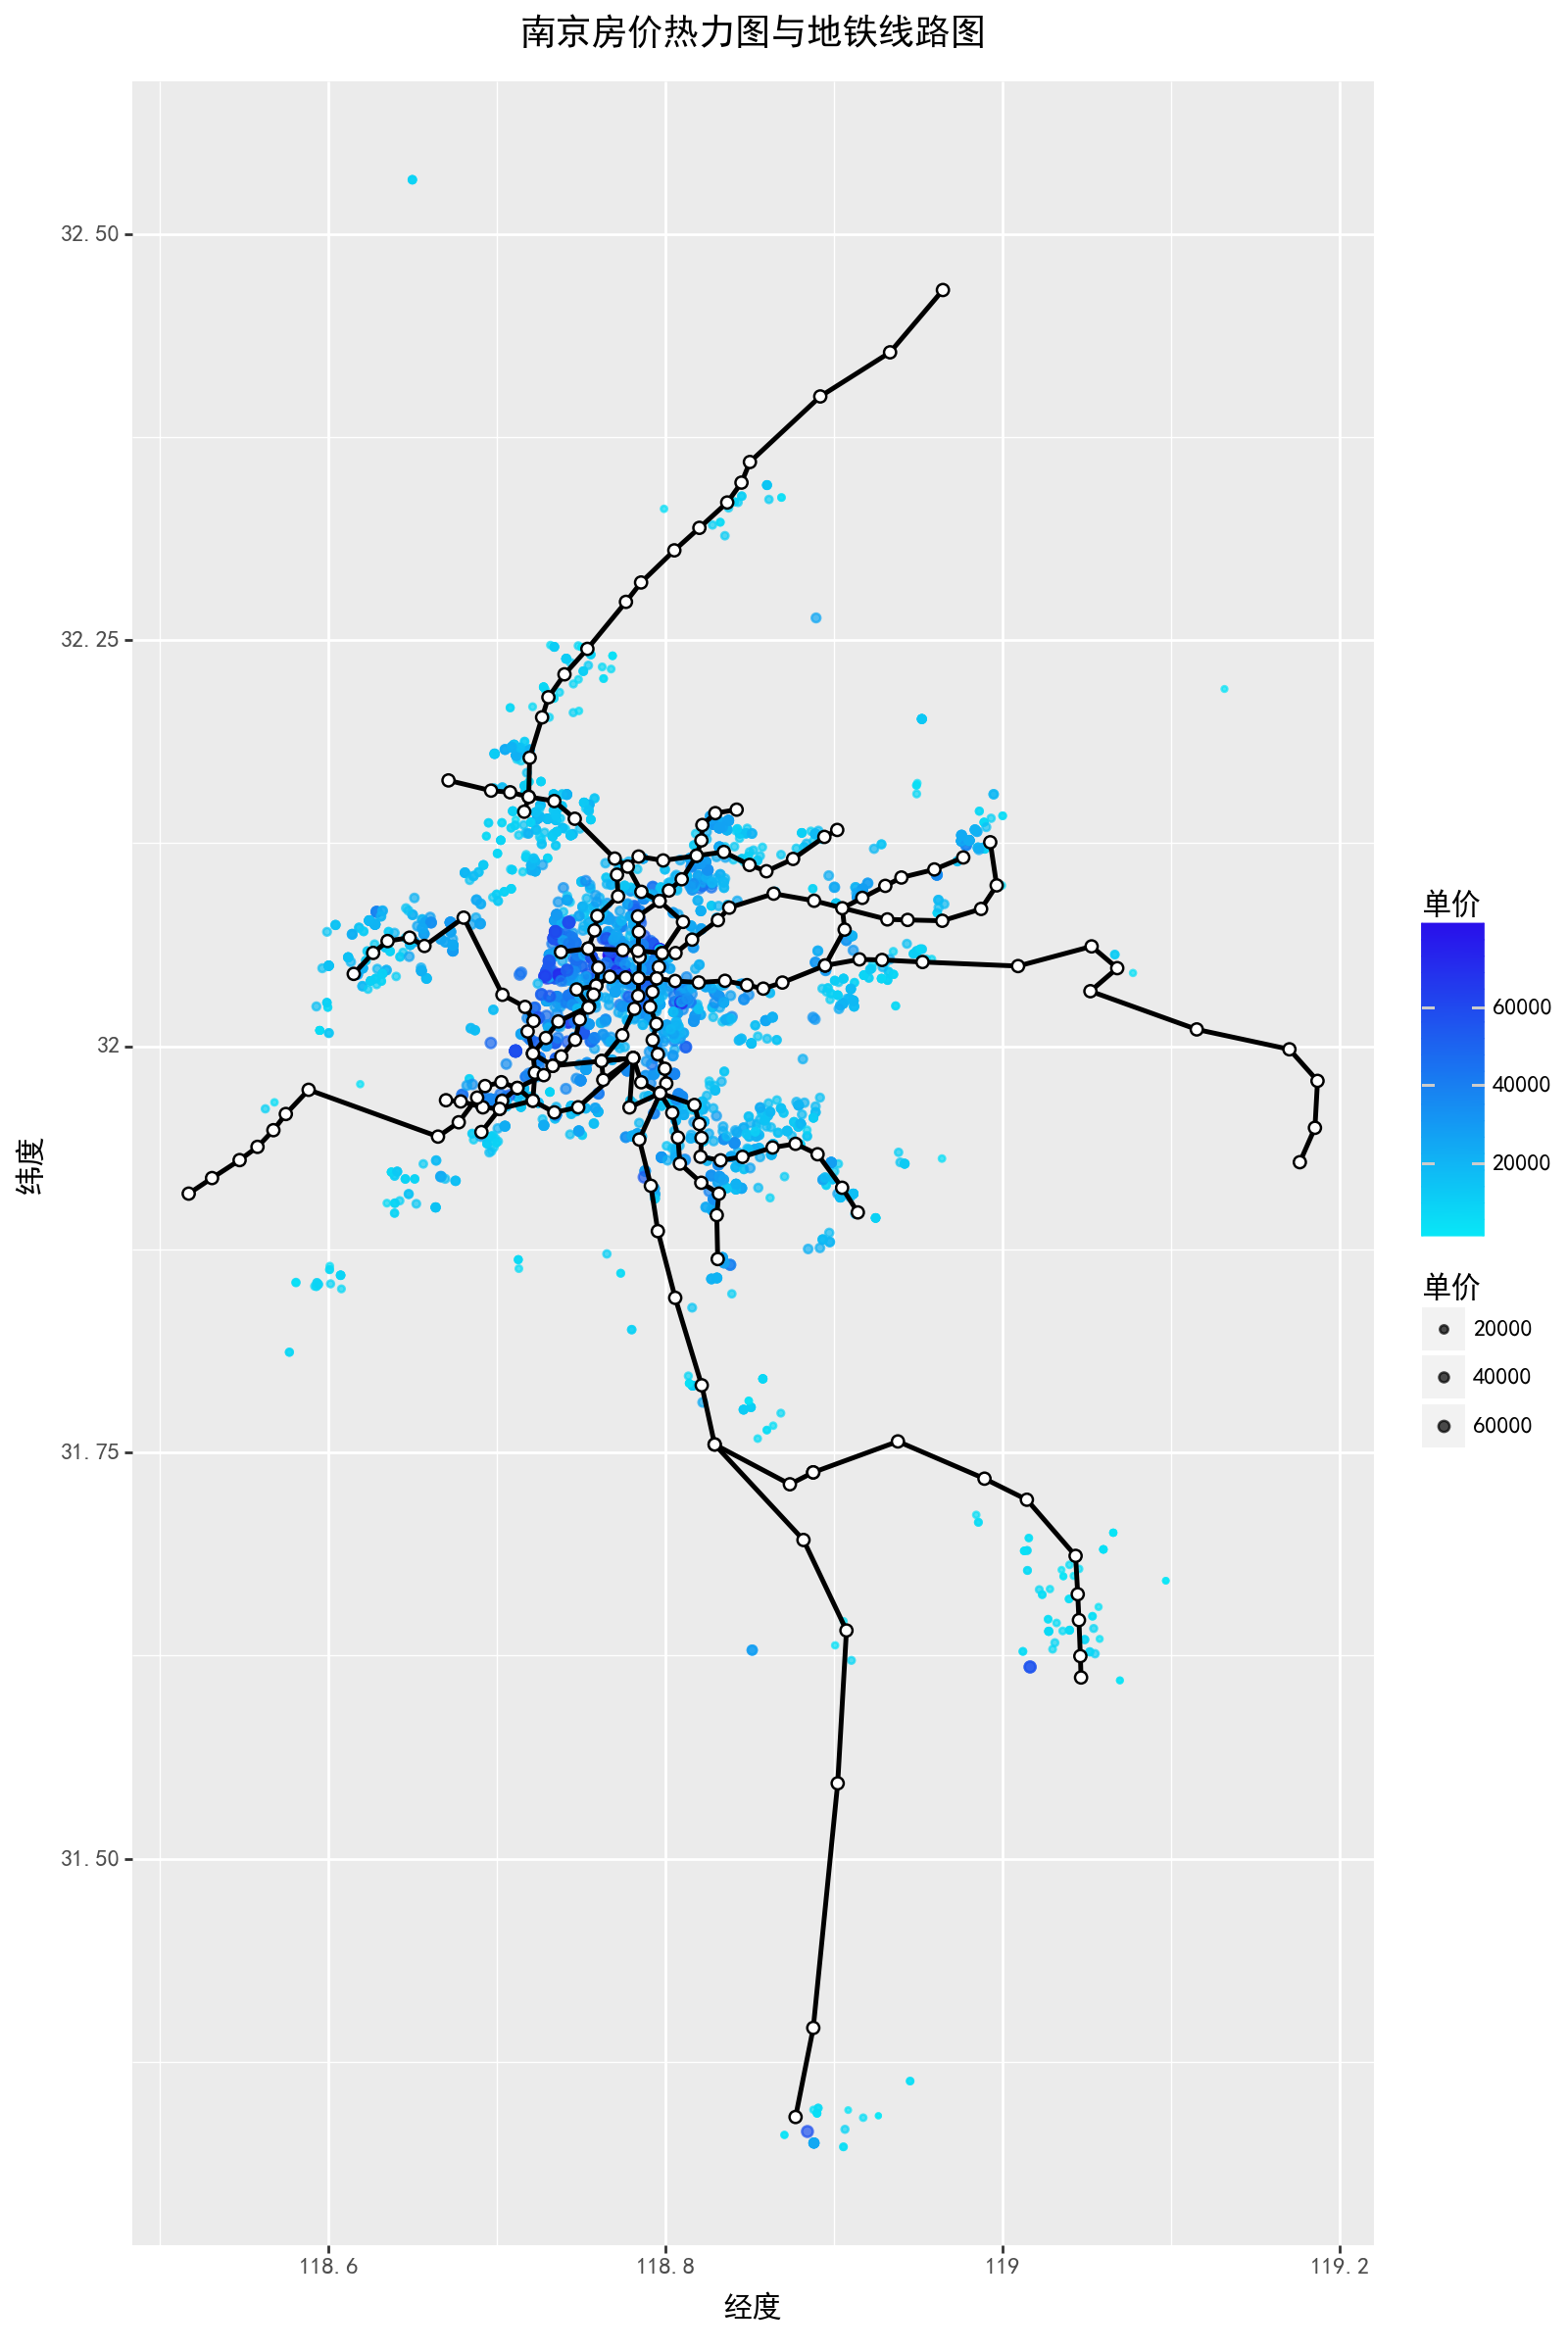

In [38]:
import csv
import re
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_path, scale_color_gradient, scale_size_continuous, labs, theme, element_text

# 正则表达式用于匹配数字
pattern = re.compile(r'(\d+)')
numbers = []

# 打开CSV文件并提取“单价”列的数据
with open('NanJingHousing—v2.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.DictReader(file)
    for row in reader:
        price = row['单价']
        price = price.replace(',', '')  # 移除千位分隔符
        match = pattern.search(price)
        if match:
            number = match.group(1)
            number = int(number)
            numbers.append(number)

# 将数据加载为DataFrame
df = pd.read_csv('NanJingHousing—v2.csv')
df['单价'] = numbers

df['单价'] = pd.to_numeric(df['单价'], errors='coerce')  # 将无效的单价转换为 NaN
df = df.dropna(subset=['单价'])  

# 读取地铁线路数据
subway_data = pd.read_csv('NanJing_version1_with_coordinates.csv', encoding='utf-8-sig')

# 创建ggplot
p = (ggplot(df)
     + aes(x='经度', y='纬度', color='单价', size='单价')
     + geom_point(alpha=0.7)  # 绘制散点图，使用alpha透明度
     + scale_color_gradient(low='#08e7f7', high='#290feb',limits=(df['单价'].min(), df['单价'].max()))  # 使用连续颜色渐变
     + scale_size_continuous(range=(0.5, 2))  # 根据单价调整点的大小
     + geom_path(aes(x='经度', y='纬度', group='address'), data=subway_data, color='black', size=1)  # 绘制地铁线路
     + geom_point(aes(x='经度', y='纬度'), data=subway_data,shape='o',size=2,fill="white",color='black')  # 绘制地铁站点
     + labs(title='南京房价热力图与地铁线路图', x='经度', y='纬度', color='单价')
     + theme(text=element_text(family='SimHei'),figure_size=(8,12),plot_title=element_text(hjust=0.5))  
)

# 显示图像
print(p)


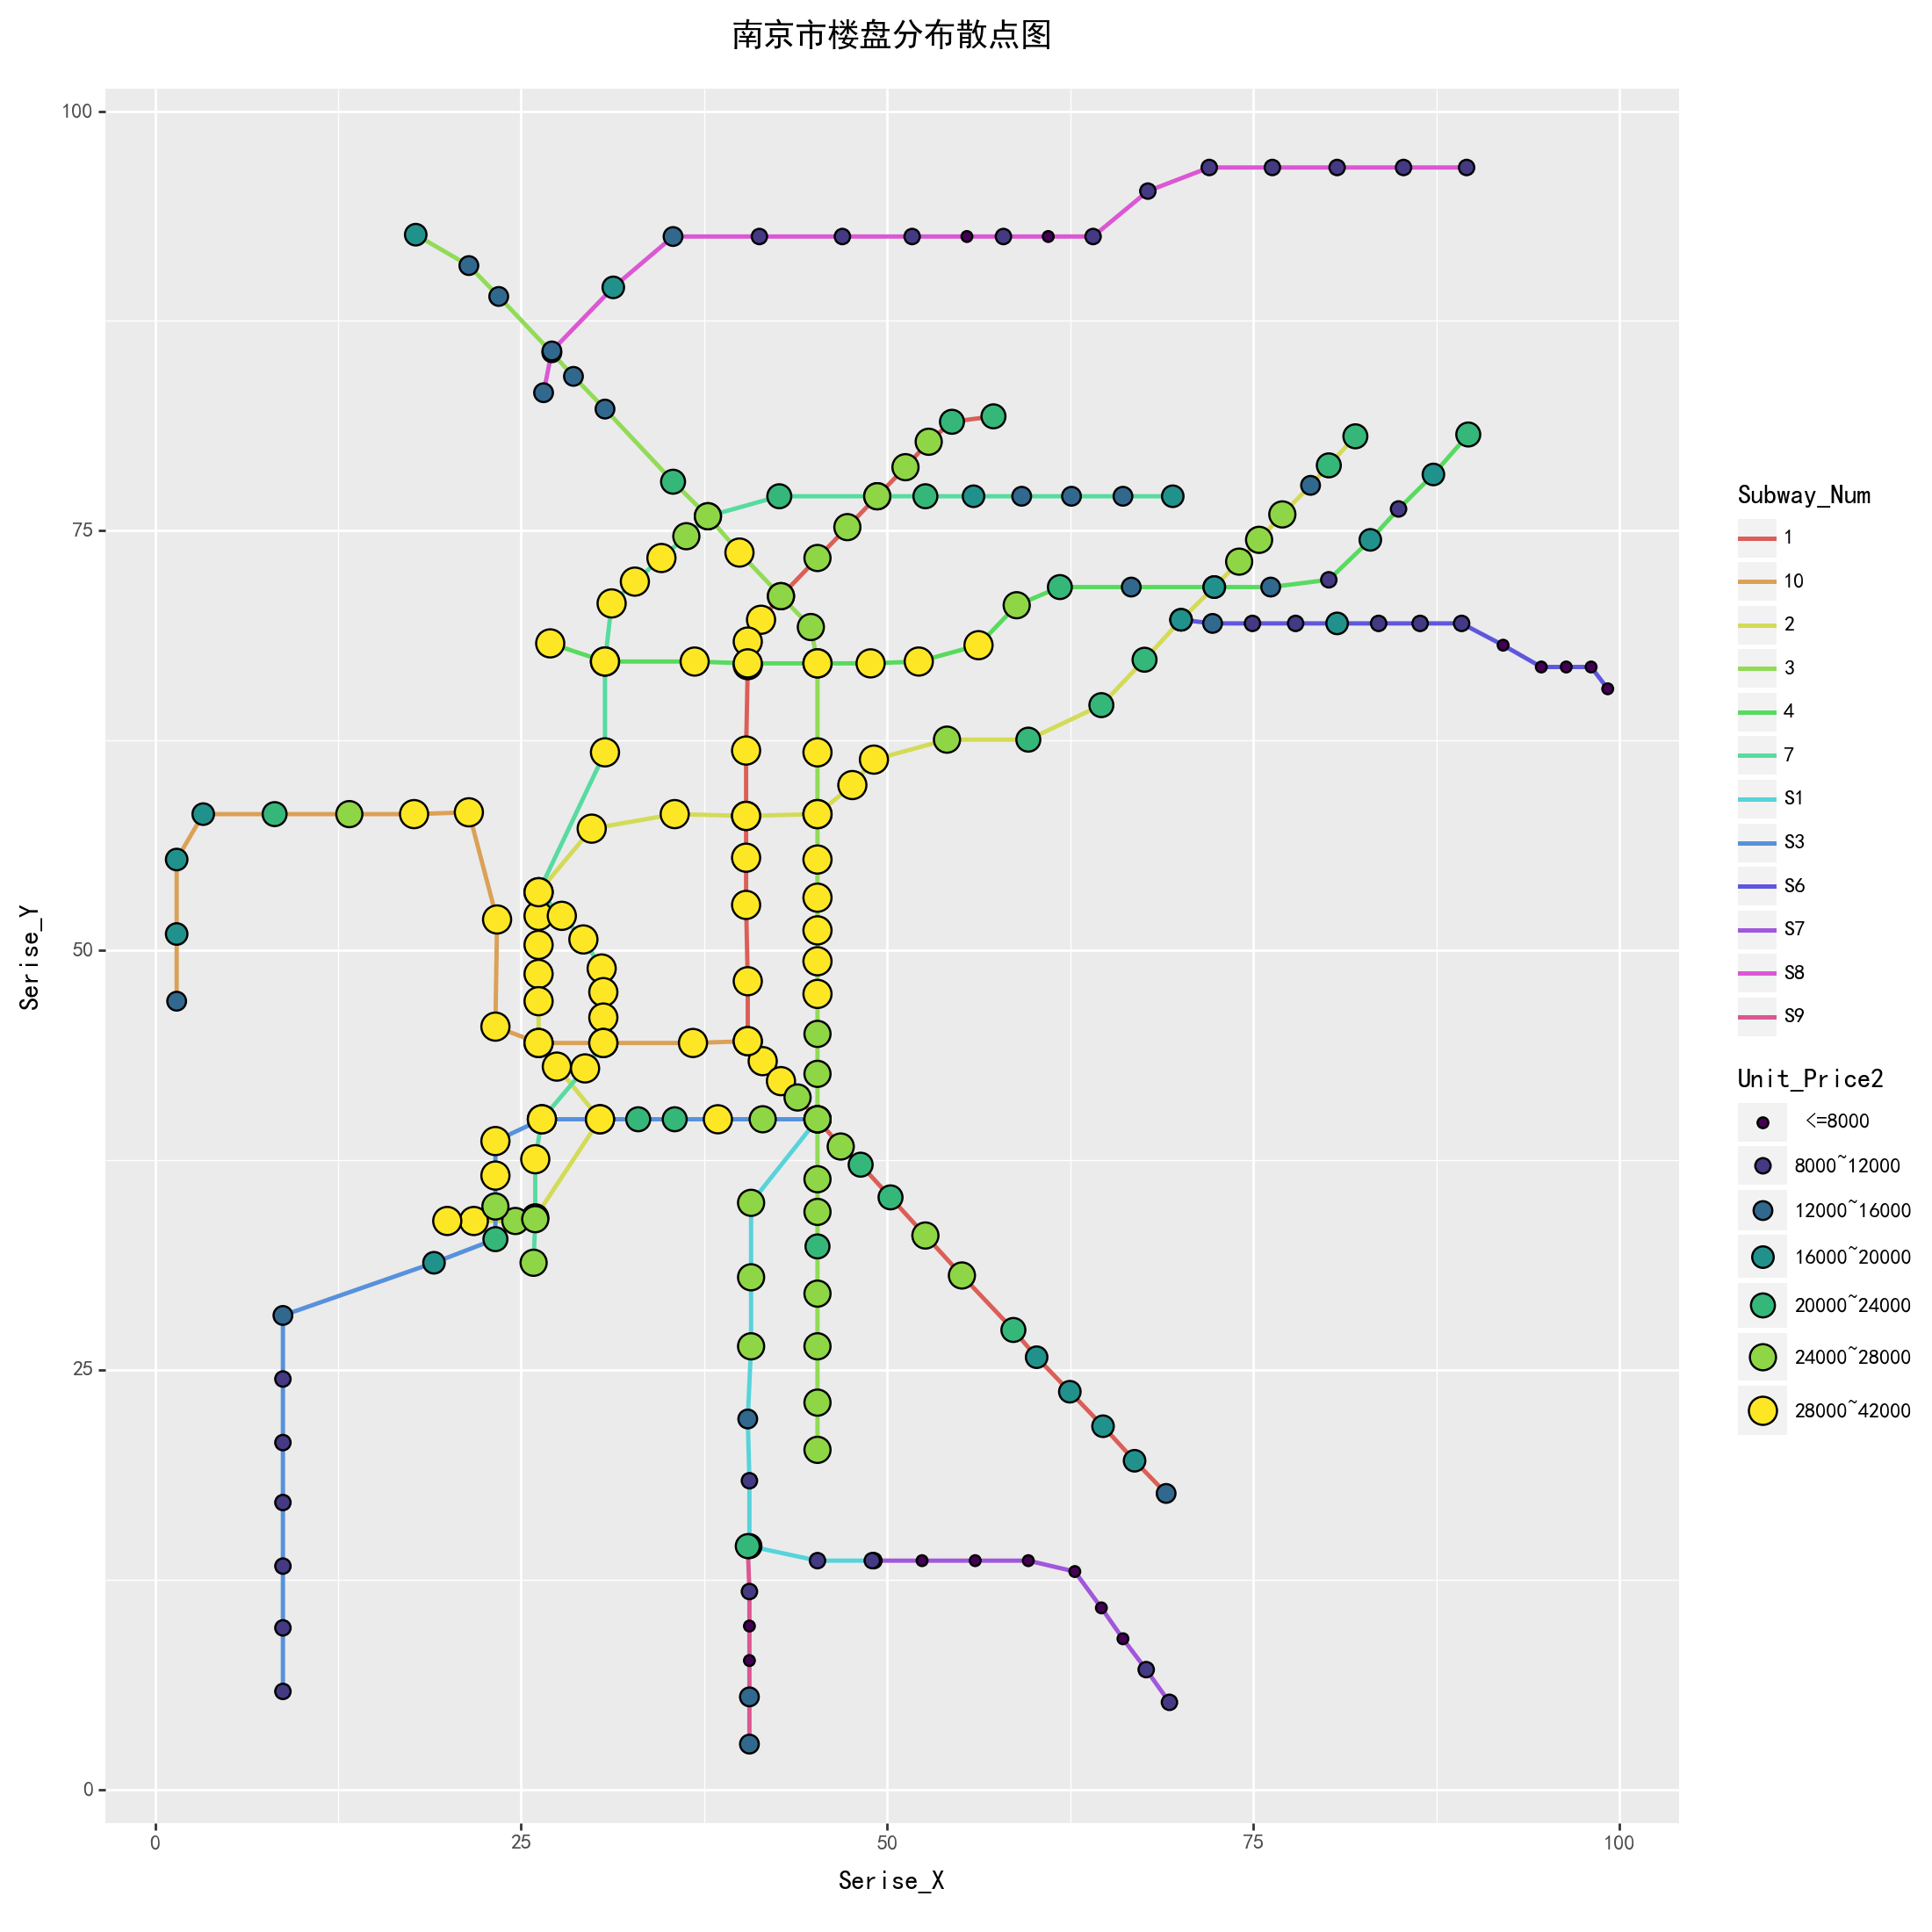

In [40]:

shdata = pd.read_csv('NanJingHousingwithsubway_updated.csv', encoding='utf-8-sig')

Price_max=np.max(shdata['平均价格'])#41846.23288
Price_min=np.min(shdata['平均价格'])#5405.0
#价格区间
shdata['Unit_Price2']=pd.cut(shdata['平均价格'],
              bins=[0,8000,12000,16000,20000,24000,28000,42000],
              labels=[" <=8000","8000~12000","12000~16000","16000~20000","20000~24000","24000~28000","28000~42000"])

base_plot = (ggplot() +
  geom_path(mydata_Path, aes(x='Serise_X', y='Serise_Y', group='Subway_Num', colour='Subway_Num'), size=1) +
  geom_point(shdata, aes(x='Serise_X', y='Serise_Y', group='address', size='Unit_Price2', fill='Unit_Price2'), shape='o') +
  labs(title='南京市楼盘分布散点图')+
  theme(
    text=element_text(family='SimHei'),
    figure_size=(11, 11),
    plot_title=element_text(hjust=0.5)
))

print(base_plot)

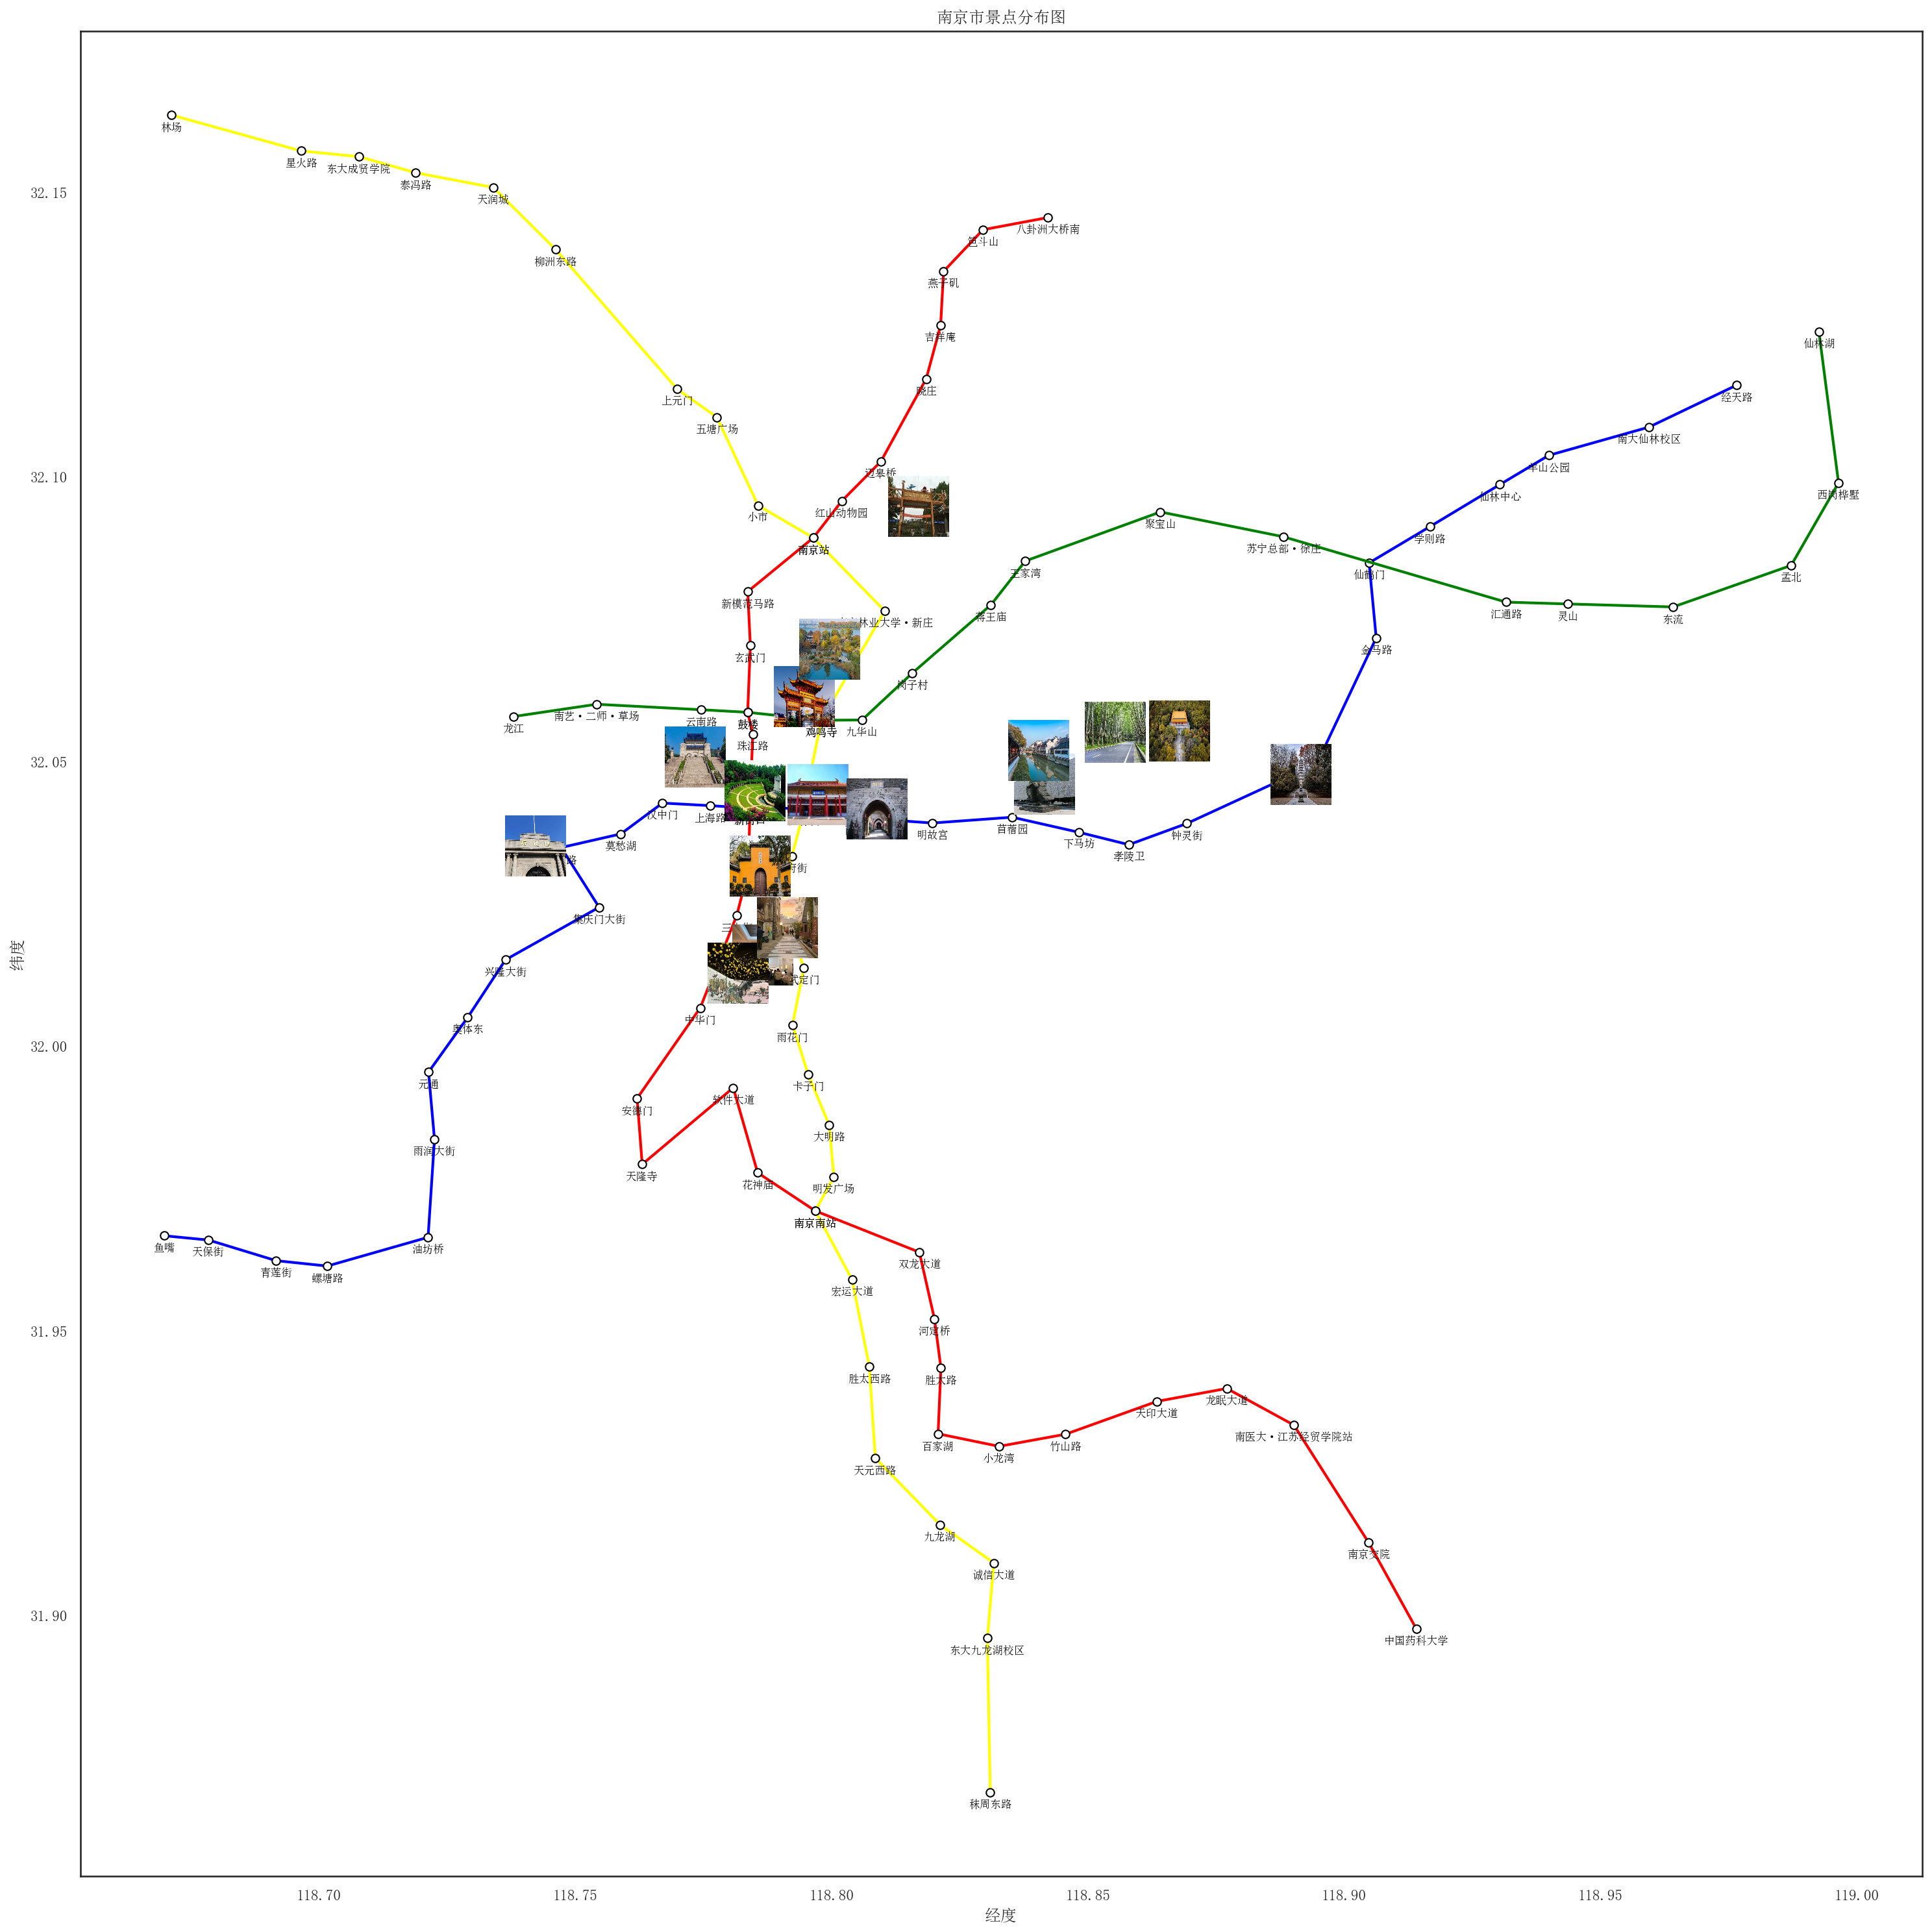

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import rcParams
import matplotlib as mpl
import pandas as pd
import os
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk

# 相对路径
data_path = './景点/景点.csv'  
image_folder = './景点'  

# 读取地铁数据和景点数据
subway_data = pd.read_csv('./NanJing_version1_with_coordinates.csv')  # 相对路径
try:
    data = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"无法找到文件：{data_path}")
    exit()  # 如果数据文件不存在，退出程序

# 过滤出地铁线路的数据
metro_line_1 = subway_data[subway_data['address'] == '1']
metro_line_2 = subway_data[subway_data['address'] == '2']
metro_line_3 = subway_data[subway_data['address'] == '3']
metro_line_4 = subway_data[subway_data['address'] == '4']

# 读取图片文件，返回图像列表
def load_images(image_folder, num_images=17):
    images = []
    for i in range(1, num_images + 1):
        img_path = os.path.join(image_folder, f'{i}.jpg')
        try:
            img = Image.open(img_path)
            images.append(OffsetImage(img, zoom=0.15))  # 转换为OffsetImage格式
        except IOError:
            print(f"无法打开图片文件: {img_path}")
    return images

# 加载景点图片
offset_images = load_images(image_folder)

# 设置 seaborn 样式
sns.set(style='white')

# 创建画布
fig, ax = plt.subplots(figsize=(20, 20), dpi=150)

# 绘制地铁线路的路径
ax.plot(metro_line_1['经度'], metro_line_1['纬度'], color='red', label='地铁1号线', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
ax.plot(metro_line_2['经度'], metro_line_2['纬度'], color='blue', label='地铁2号线', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
ax.plot(metro_line_3['经度'], metro_line_3['纬度'], color='yellow', label='地铁3号线', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
ax.plot(metro_line_4['经度'], metro_line_4['纬度'], color='green', label='地铁4号线', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')

# 绘制散点图，显示景点位置
ax.scatter(x=data['lng'], y=data['lat'], c='red')

# 设置坐标轴标签
mpl.rcParams['font.sans-serif'] = ['SimSun']  # 使用支持中文的字体
mpl.rcParams['axes.unicode_minus'] = False    # 显示负号
plt.title('南京市景点分布图')
plt.xlabel('经度')
plt.ylabel('纬度')
plt.tight_layout() 
delta_y = 0.003
# 在每个站点位置添加站点名称和图片
for i, (x0, y0) in enumerate(zip(metro_line_1['经度'], metro_line_1['纬度'])):
    station_name = metro_line_1.iloc[i]['name']
    ax.text(x0, y0-delta_y, station_name, fontsize=8, ha='center', va='bottom', color='black', fontweight='bold')

for i, (x0, y0) in enumerate(zip(metro_line_2['经度'], metro_line_2['纬度'])):
    station_name = metro_line_2.iloc[i]['name']
    ax.text(x0, y0-delta_y, station_name, fontsize=8, ha='center', va='bottom', color='black', fontweight='bold')

for i, (x0, y0) in enumerate(zip(metro_line_3['经度'], metro_line_3['纬度'])):
    station_name = metro_line_3.iloc[i]['name']
    ax.text(x0, y0-delta_y, station_name, fontsize=8, ha='center', va='bottom', color='black', fontweight='bold')

for i, (x0, y0) in enumerate(zip(metro_line_4['经度'], metro_line_4['纬度'])):
    station_name = metro_line_4.iloc[i]['name']
    ax.text(x0, y0-delta_y, station_name, fontsize=8, ha='center', va='bottom', color='black', fontweight='bold')

# 添加景点图片
for i, im in enumerate(offset_images):
    ab = AnnotationBbox(im, (data['lng'][i], data['lat'][i]), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

# 创建 Tkinter 窗口
root = tk.Tk()
root.title("南京市景点地图")

# 创建一个Canvas容器来显示图形
frame = ttk.Frame(root)
frame.pack(fill=tk.BOTH, expand=True)

# 创建Canvas并添加滚动条
canvas = tk.Canvas(frame)
scrollbar_x = tk.Scrollbar(frame, orient="horizontal", command=canvas.xview)
scrollbar_y = tk.Scrollbar(frame, orient="vertical", command=canvas.yview)
canvas.configure(xscrollcommand=scrollbar_x.set, yscrollcommand=scrollbar_y.set)

scrollbar_x.pack(side=tk.BOTTOM, fill=tk.X)
scrollbar_y.pack(side=tk.RIGHT, fill=tk.Y)
canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

# 将matplotlib图形嵌入Canvas
canvas_figure = FigureCanvasTkAgg(fig, canvas)
canvas_figure.draw()

# 创建一个绘图区域并将其嵌入Canvas
canvas.create_window((0, 0), window=canvas_figure.get_tk_widget(), anchor="nw")

# 更新滚动区域
canvas.config(scrollregion=canvas.bbox("all"))


# 启动Tkinter主循环
root.mainloop()

c:\Users\18480\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


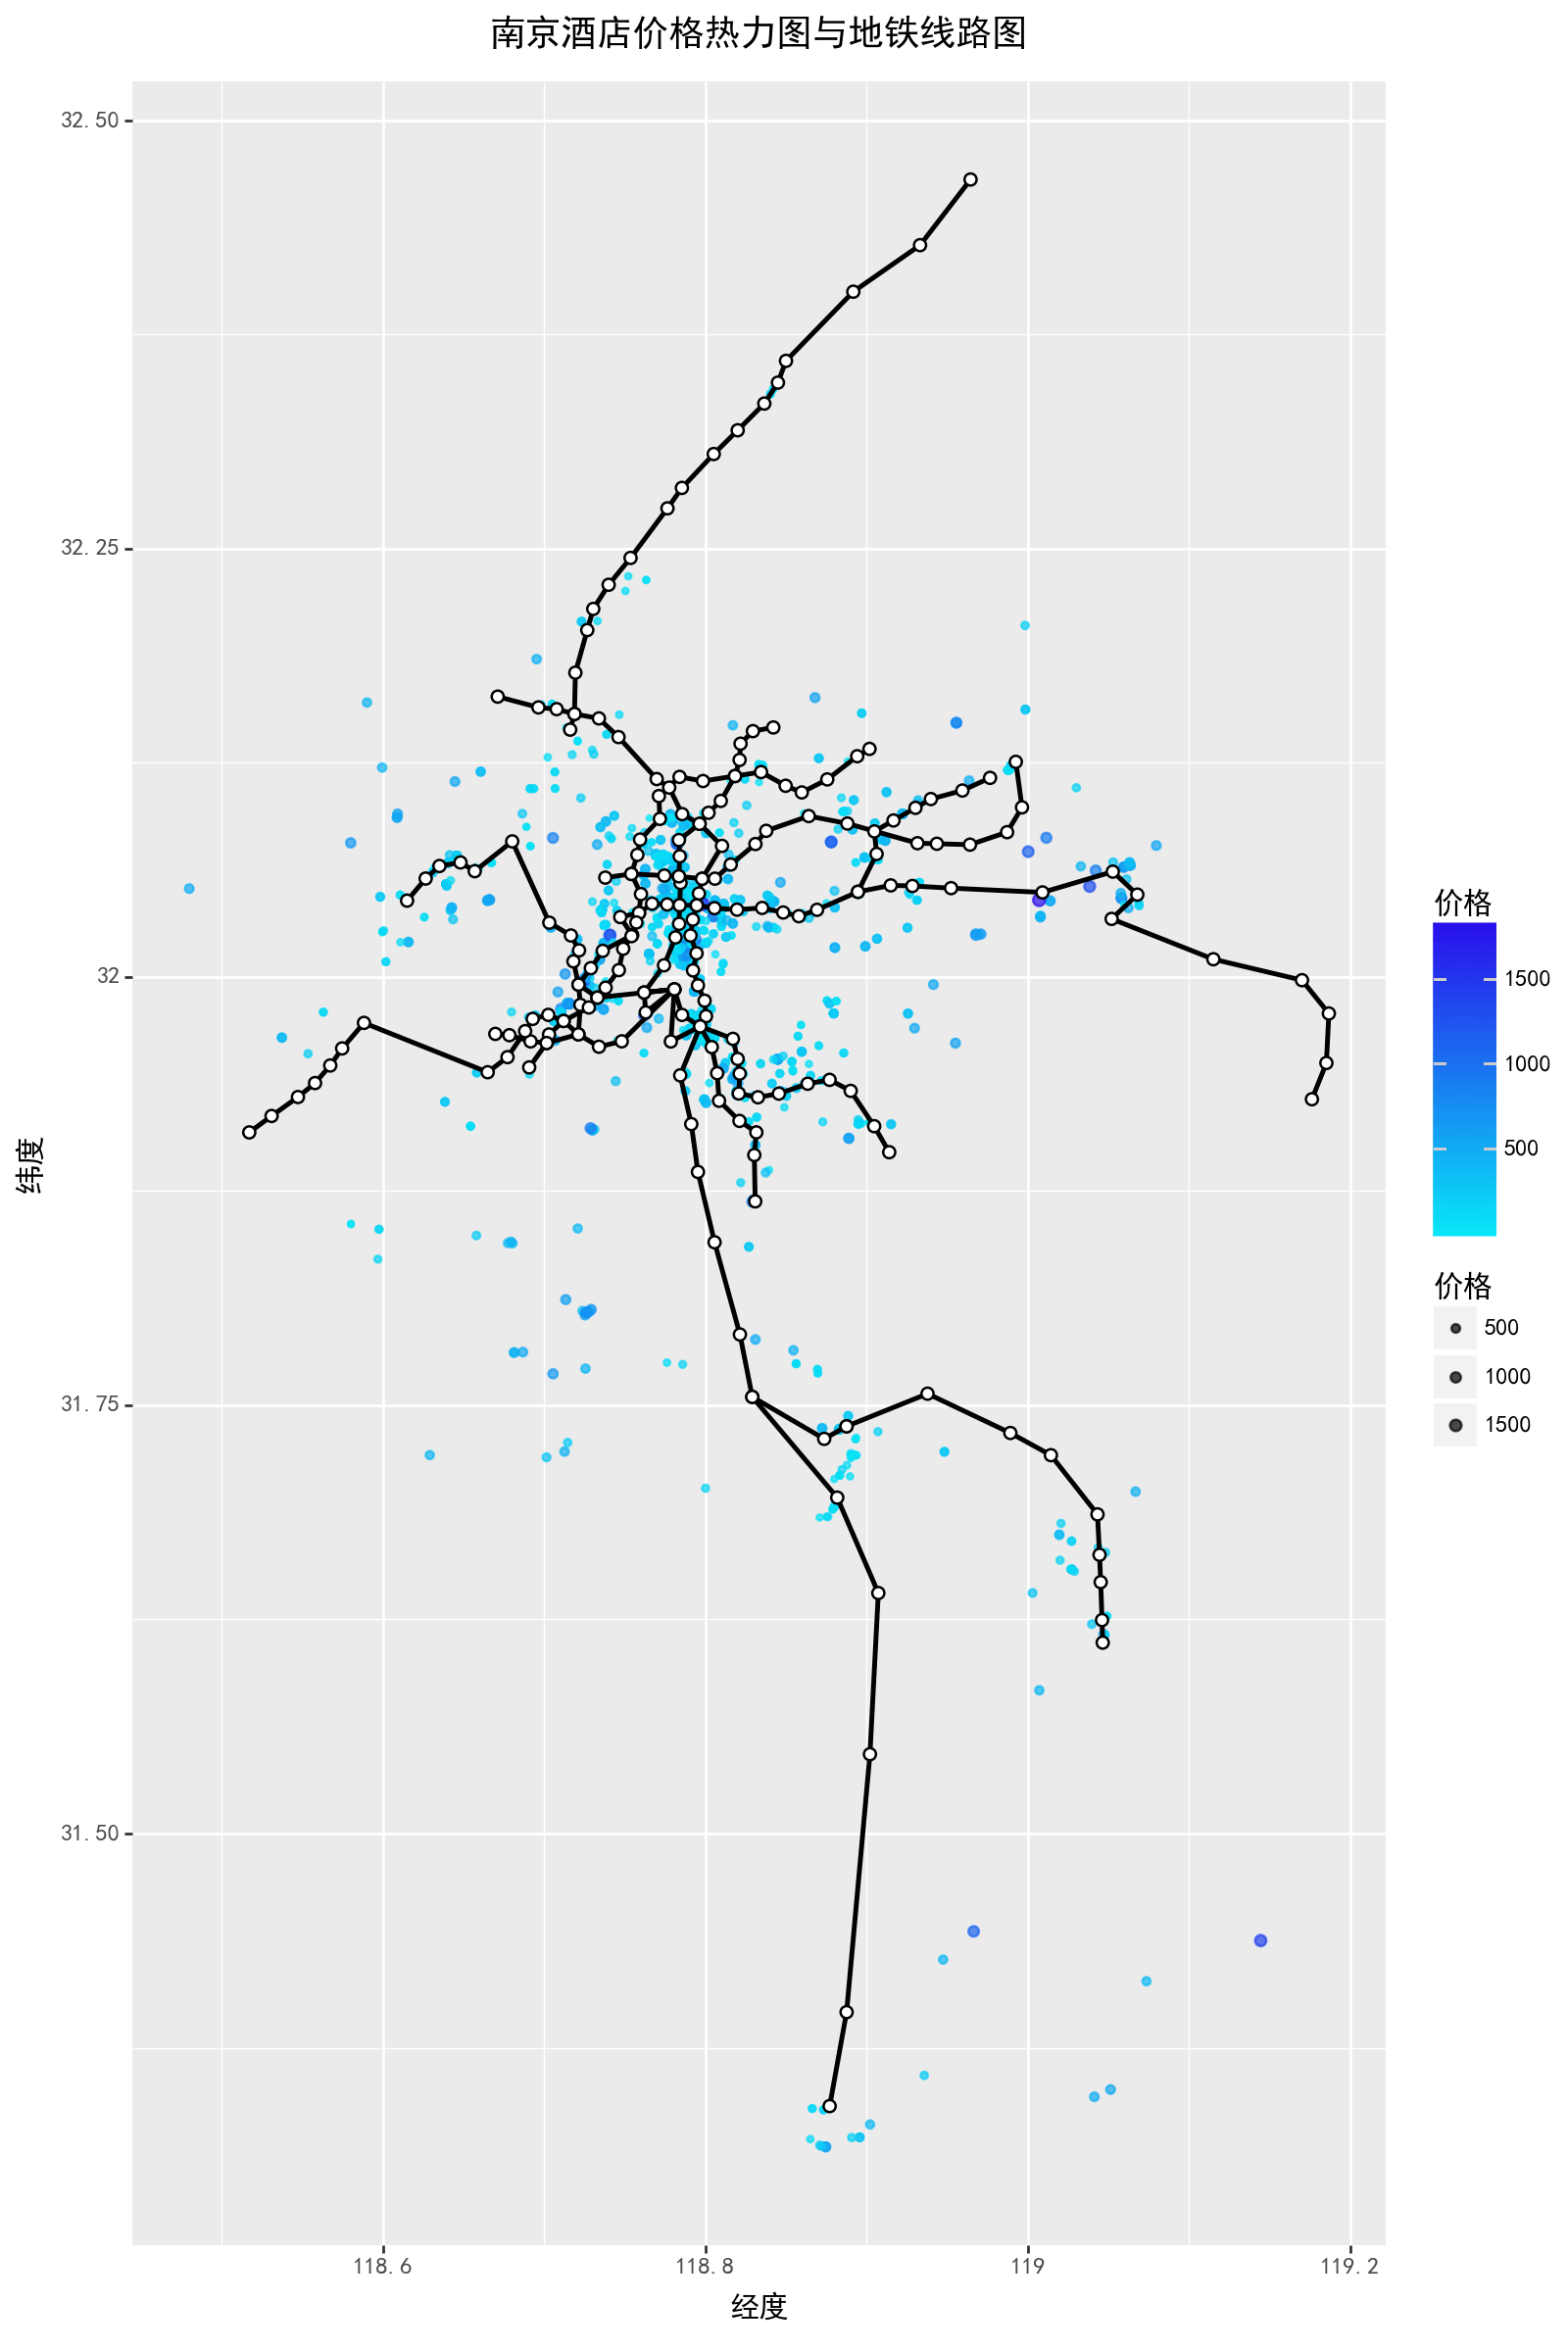

In [59]:
Hf=pd.read_csv('hoteldata.csv')
Hf['价格'] = pd.to_numeric(Hf['价格'], errors='coerce')
h = (ggplot(Hf)
     + aes(x='经度', y='纬度', color='价格', size='价格')
     + geom_point(alpha=0.7)  # 绘制散点图，使用alpha透明度
     + scale_color_gradient(low='#08e7f7', high='#290feb',limits=(Hf['价格'].min(), Hf['价格'].max()))  # 使用连续颜色渐变
     + scale_size_continuous(range=(0.5, 2))  # 根据单价调整点的大小
     + geom_path(aes(x='经度', y='纬度', group='address'), data=subway_data, color='black', size=1)  # 绘制地铁线路
     + geom_point(aes(x='经度', y='纬度'), data=subway_data,shape='o',size=2,fill="white",color='black')  # 绘制地铁站点
     + labs(title='南京酒店价格热力图与地铁线路图', x='经度', y='纬度', color='价格')
     + theme(text=element_text(family='SimHei'),figure_size=(8,12),plot_title=element_text(hjust=0.5))  # 设置中文字体
)
print(h)


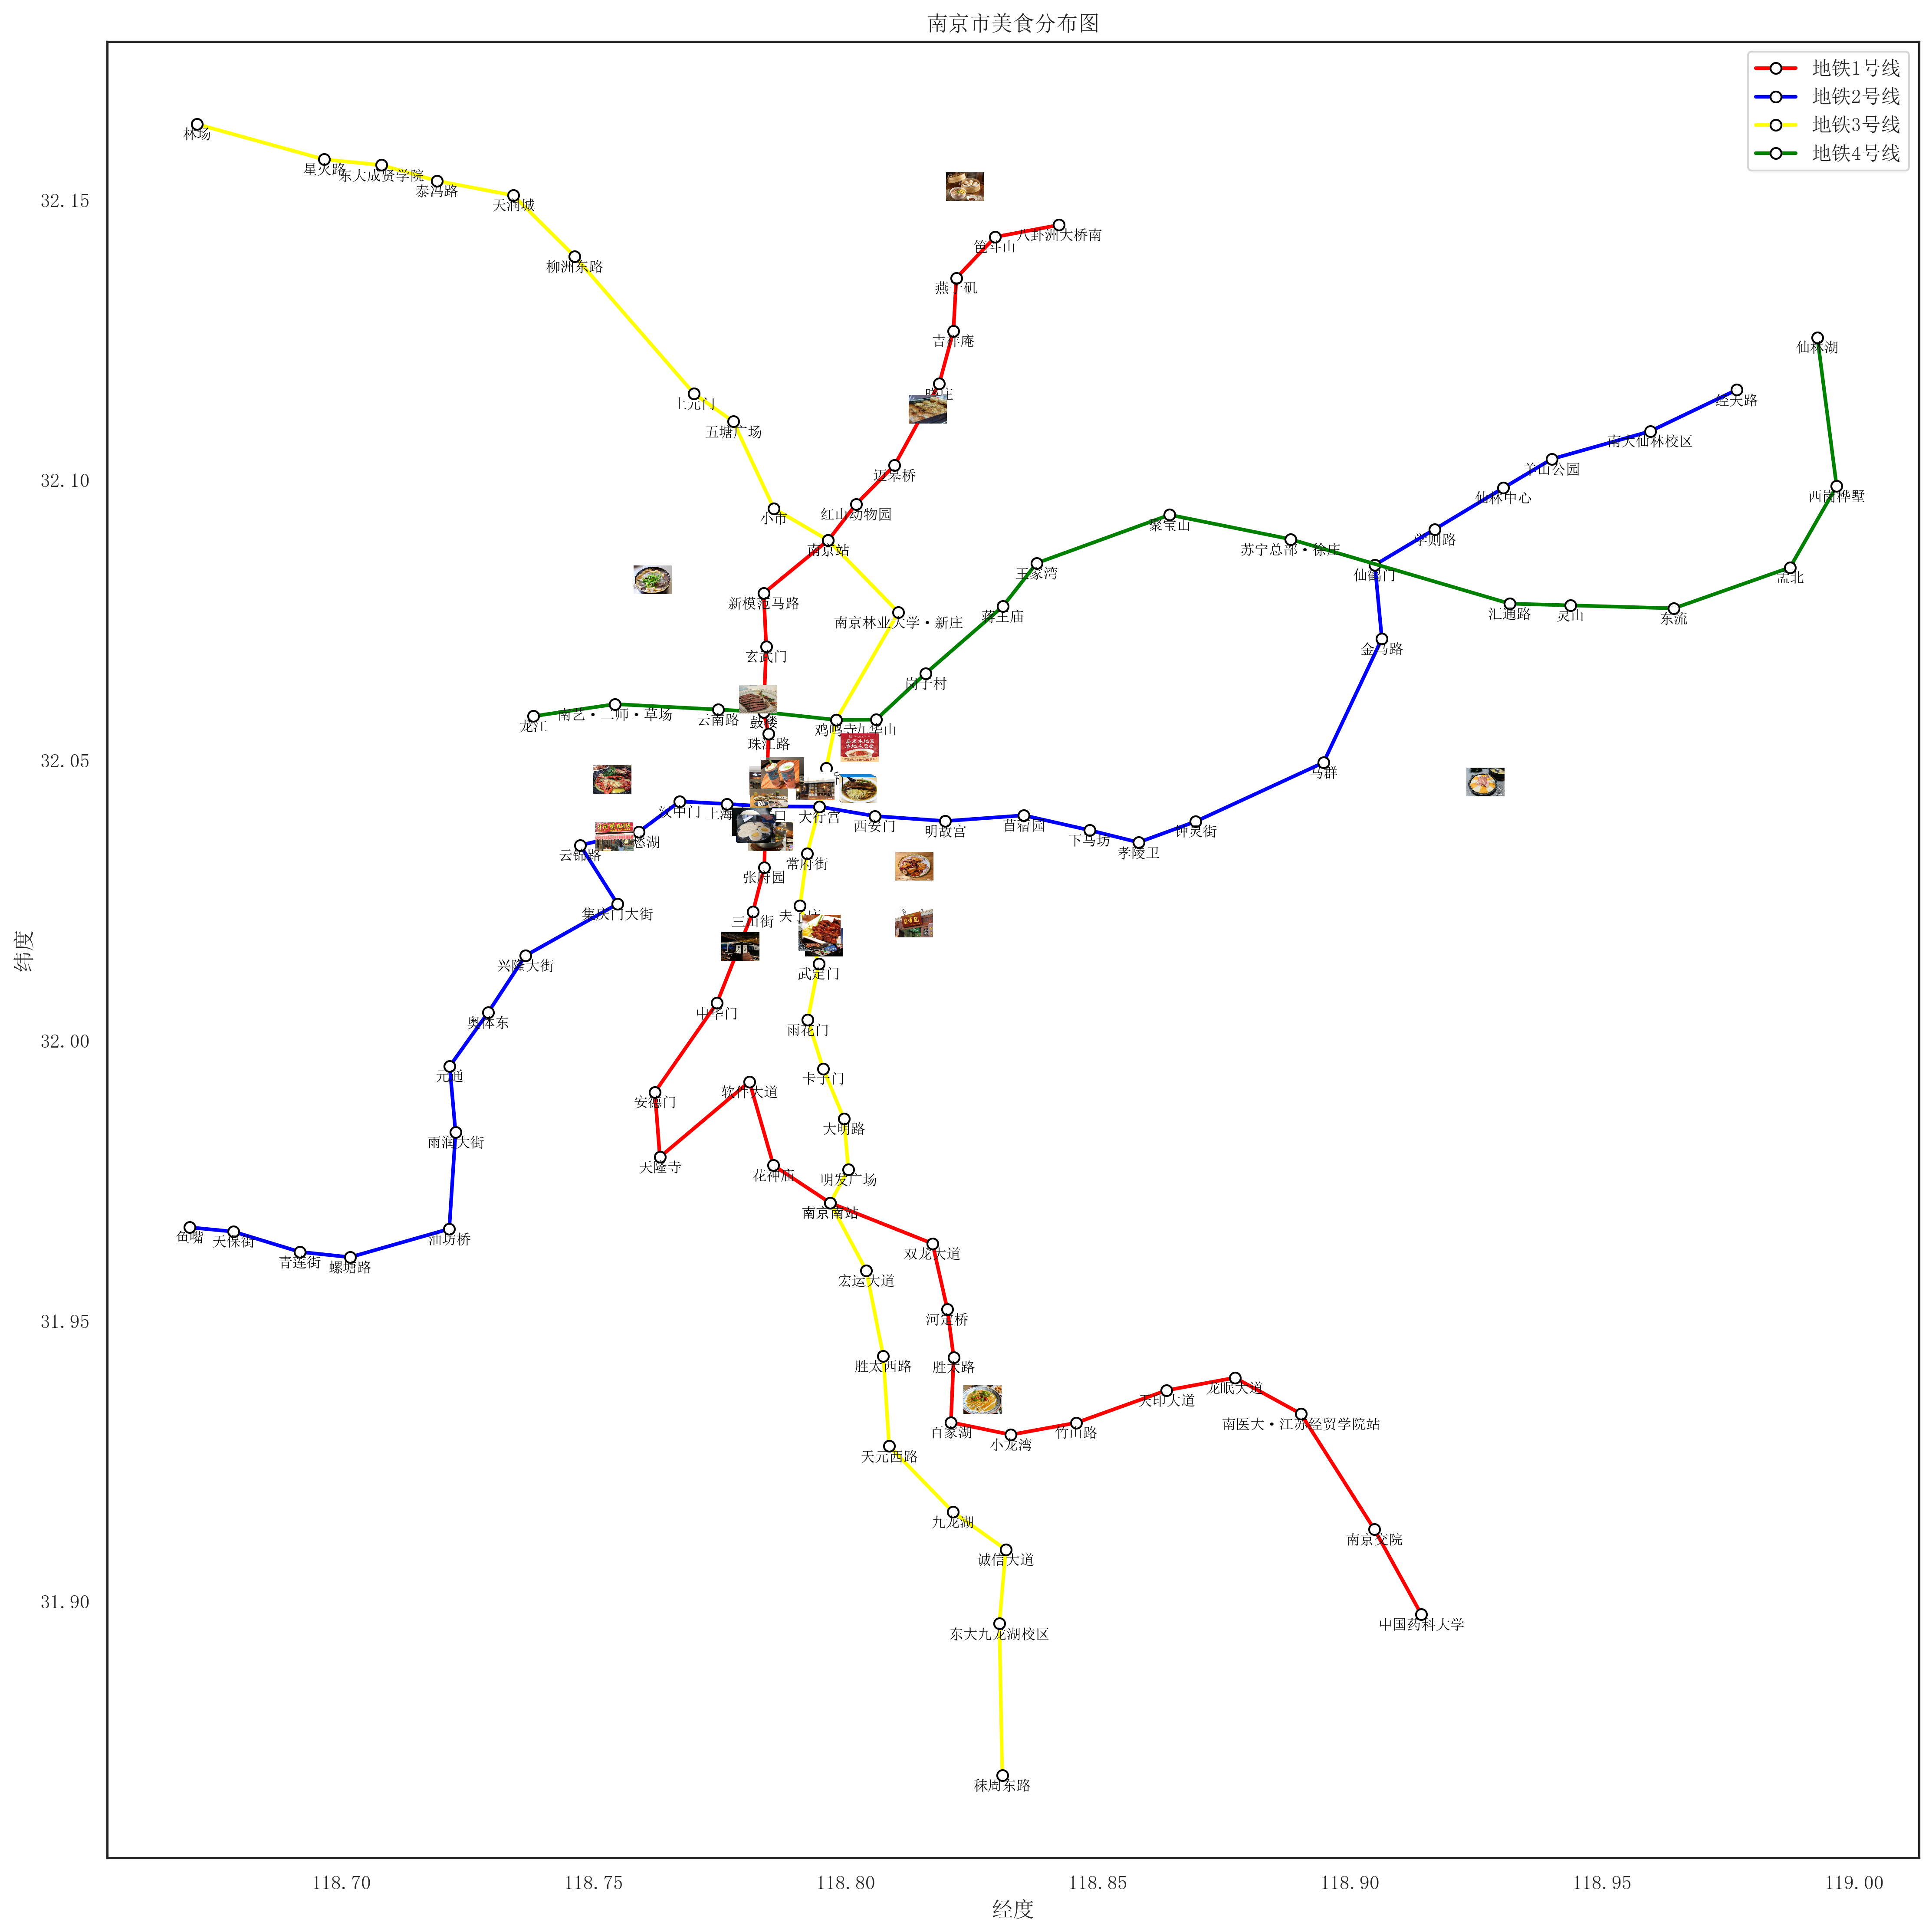

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import rcParams
import matplotlib as mpl
import pandas as pd
import os
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
data_path = './美食位置/经典店名.csv' 
image_folder = './/美食位置/图片/'  

# 读取地铁数据和景点数据
subway_data = pd.read_csv('NanJing_version1_with_coordinates.csv')
try:
    data = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"无法找到文件：{data_path}")
    exit()  # 如果数据文件不存在，退出程序
# 过滤出地铁1号线的数据
metro_line_1 = subway_data[subway_data['address'] == '1']
# 过滤出地铁2号线的数据
metro_line_2 = subway_data[subway_data['address'] == '2']  
# 过滤出地铁3号线的数据
metro_line_3 = subway_data[subway_data['address'] == '3']
# 过滤出地铁4号线的数据
metro_line_4 = subway_data[subway_data['address'] == '4']
# 读取图片文件，返回图像列表
def load_images(image_folder, num_images=26):
    images = []
    for i in range(1, num_images + 1):
        img_path = os.path.join(image_folder, f'{i}.jpg')
        try:
            img = Image.open(img_path)
            images.append(OffsetImage(img, zoom=0.03))  # 转换为OffsetImage格式，缩放比例可以根据需要调整
        except IOError:
            print(f"无法打开图片文件: {img_path}")
    return images

# 加载景点图片
offset_images = load_images(image_folder)

# 设置 seaborn 样式
sns.set(style='white')

# 创建画布
fig, ax = plt.subplots(figsize=(15, 15), dpi=300)
# 绘制地铁1号线的路径
ax.plot(metro_line_1['经度'], metro_line_1['纬度'], color='red', label='地铁1号线', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
# 绘制地铁2号线的路径
ax.plot(metro_line_2['经度'], metro_line_2['纬度'], color='blue', label='地铁2号线', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
# 绘制地铁3号线的路径
ax.plot(metro_line_3['经度'], metro_line_3['纬度'], color='yellow', label='地铁3号线', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
# 绘制地铁4号线的路径
ax.plot(metro_line_4['经度'], metro_line_4['纬度'], color='green', label='地铁4号线', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
# 绘制散点图，显示美食地点位置
ax.scatter(x=data['经度'], y=data['纬度'], c='red')

# 设置坐标轴标签
mpl.rcParams['font.sans-serif'] = ['SimSun']  # 使用支持中文的字体
mpl.rcParams['axes.unicode_minus'] = False    # 显示负号
plt.xlabel('经度')
plt.ylabel('纬度')
delta_y = 0.003 
# 在每个站点位置添加站点名称和图片
for i, (x0, y0) in enumerate(zip(metro_line_1['经度'], metro_line_1['纬度'])):
    # 添加站点名称
    station_name = metro_line_1.iloc[i]['name'] 
    ax.text(x0, y0-delta_y, station_name, fontsize=8, ha='center', va='bottom', color='black', fontweight='bold')
    
for i, (x0, y0) in enumerate(zip(metro_line_2['经度'], metro_line_2['纬度'])):
    # 添加站点名称
    station_name = metro_line_2.iloc[i]['name'] 
    ax.text(x0, y0-delta_y, station_name, fontsize=8, ha='center', va='bottom', color='black', fontweight='bold')
for i, (x0, y0) in enumerate(zip(metro_line_3['经度'], metro_line_3['纬度'])):
    # 添加站点名称
    station_name = metro_line_3.iloc[i]['name'] 
    ax.text(x0, y0-delta_y, station_name, fontsize=8, ha='center', va='bottom', color='black', fontweight='bold')
for i, (x0, y0) in enumerate(zip(metro_line_4['经度'], metro_line_4['纬度'])):
    # 添加站点名称
    station_name = metro_line_4.iloc[i]['name'] 
    ax.text(x0, y0-delta_y, station_name, fontsize=8, ha='center', va='bottom', color='black', fontweight='bold')
           
    # 添加美食地点图片
for i,(im) in enumerate(offset_images):
    ab = AnnotationBbox(im, (data['经度'][i], data['纬度'][i]), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)
'''
for i,(x0,y0) in enumerate(zip(data['经度'],data['纬度'])):
    Dname = data['店名'].iloc[i]
    ax.text(x0-0.005,y0-0.003,Dname,fontsize=10,ha='center',va='bottom',color='red',fontweight='bold')
'''
# 显示图例
plt.legend()
plt.title('南京市美食分布图')
plt.tight_layout() 
# 创建 Tkinter 窗口
root = tk.Tk()
root.title("南京市美食分布图")

# 创建一个Canvas容器来显示图形
frame = ttk.Frame(root)
frame.pack(fill=tk.BOTH, expand=True)

# 创建Canvas并添加滚动条
canvas = tk.Canvas(frame)
scrollbar_x = tk.Scrollbar(frame, orient="horizontal", command=canvas.xview)
scrollbar_y = tk.Scrollbar(frame, orient="vertical", command=canvas.yview)
canvas.configure(xscrollcommand=scrollbar_x.set, yscrollcommand=scrollbar_y.set)

scrollbar_x.pack(side=tk.BOTTOM, fill=tk.X)
scrollbar_y.pack(side=tk.RIGHT, fill=tk.Y)
canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

# 将matplotlib图形嵌入Canvas
canvas_figure = FigureCanvasTkAgg(fig, canvas)
canvas_figure.draw()

# 创建一个绘图区域并将其嵌入Canvas
canvas.create_window((0, 0), window=canvas_figure.get_tk_widget(), anchor="nw")

# 更新滚动区域
canvas.config(scrollregion=canvas.bbox("all"))


# 启动Tkinter主循环
root.mainloop()

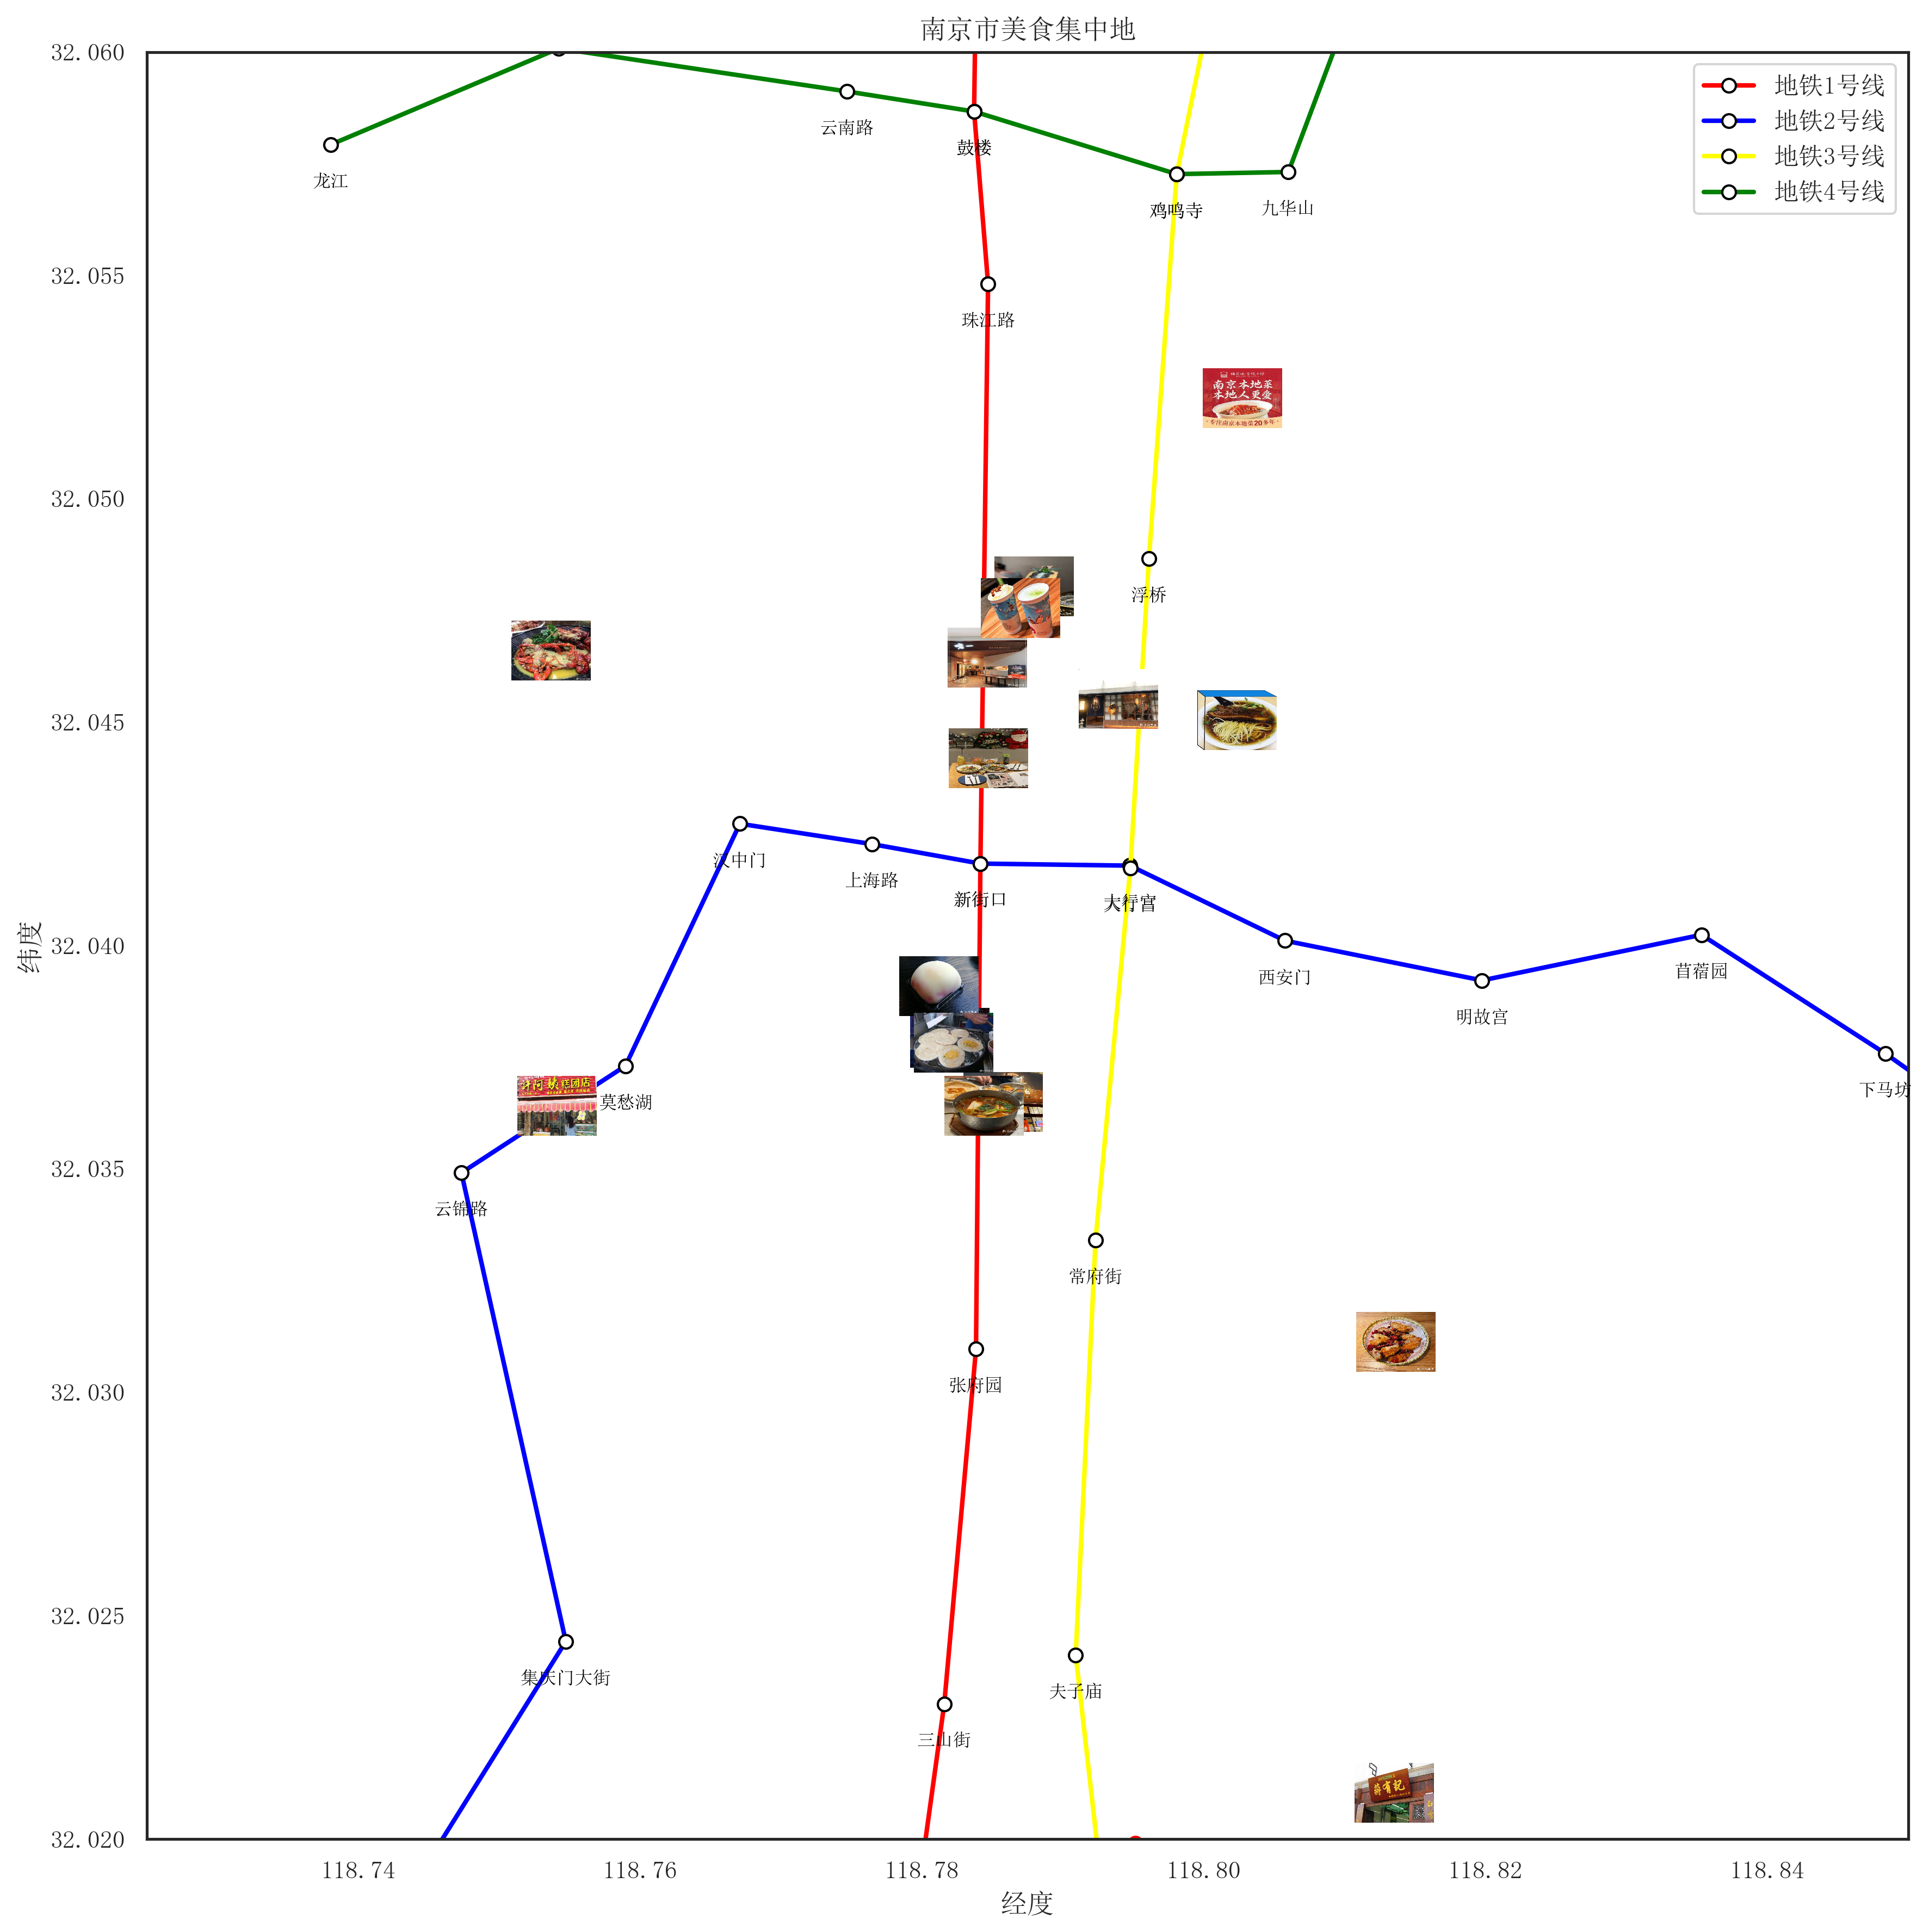

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import rcParams
import matplotlib as mpl
import pandas as pd
import os
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
data_path = './美食位置/经典店名.csv' 
image_folder = './/美食位置/图片/'  

# 读取地铁数据和景点数据
subway_data = pd.read_csv('NanJing_version1_with_coordinates.csv')
try:
    data = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"无法找到文件：{data_path}")
    exit()  # 如果数据文件不存在，退出程序

# 过滤出地铁1号线的数据
metro_line_1 = subway_data[subway_data['address'] == '1']
# 过滤出地铁2号线的数据
metro_line_2 = subway_data[subway_data['address'] == '2']  
# 过滤出地铁3号线的数据
metro_line_3 = subway_data[subway_data['address'] == '3']
# 过滤出地铁4号线的数据
metro_line_4 = subway_data[subway_data['address'] == '4']

# 读取图片文件，返回图像列表
def load_images(image_folder, num_images=26):
    images = []
    for i in range(1, num_images + 1):
        img_path = os.path.join(image_folder, f'{i}.jpg')
        try:
            img = Image.open(img_path)
            images.append(OffsetImage(img, zoom=0.05))  # 转换为OffsetImage格式，缩放比例可以根据需要调整
        except IOError:
            print(f"无法打开图片文件: {img_path}")
    return images

# 加载景点图片
offset_images = load_images(image_folder)

# 设置 seaborn 样式
sns.set(style='white')

# 创建画布
fig, ax = plt.subplots(figsize=(12, 12), dpi=300)

# 绘制地铁1号线的路径
ax.plot(metro_line_1['经度'], metro_line_1['纬度'], color='red', label='地铁1号线', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
# 绘制地铁2号线的路径
ax.plot(metro_line_2['经度'], metro_line_2['纬度'], color='blue', label='地铁2号线', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
# 绘制地铁3号线的路径
ax.plot(metro_line_3['经度'], metro_line_3['纬度'], color='yellow', label='地铁3号线', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
# 绘制地铁4号线的路径
ax.plot(metro_line_4['经度'], metro_line_4['纬度'], color='green', label='地铁4号线', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')

# 绘制散点图，显示美食地点位置
ax.scatter(x=data['经度'], y=data['纬度'], c='red')

# 设置坐标轴标签
mpl.rcParams['font.sans-serif'] = ['SimSun']  # 使用支持中文的字体
mpl.rcParams['axes.unicode_minus'] = False    # 显示负号
plt.xlabel('经度')
plt.ylabel('纬度')

# 设置绘图范围
ax.set_xlim(118.725, 118.85)  # 设置经度范围
ax.set_ylim(32.02, 32.06)     # 设置纬度范围

delta_y = 0.001 

# 在每个站点位置添加站点名称和图片
for i, (x0, y0) in enumerate(zip(metro_line_1['经度'], metro_line_1['纬度'])):
    if 118.725 <= x0 <= 118.85 and 32.02 <= y0 <= 32.06:  # 检查经纬度是否在绘图范围内
        # 添加站点名称
        station_name = metro_line_1.iloc[i]['name'] 
        ax.text(x0, y0-delta_y, station_name, fontsize=8, ha='center', va='bottom', color='black', fontweight='bold')

for i, (x0, y0) in enumerate(zip(metro_line_2['经度'], metro_line_2['纬度'])):
    if 118.725 <= x0 <= 118.85 and 32.02 <= y0 <= 32.06:  # 检查经纬度是否在绘图范围内
        # 添加站点名称
        station_name = metro_line_2.iloc[i]['name'] 
        ax.text(x0, y0-delta_y, station_name, fontsize=8, ha='center', va='bottom', color='black', fontweight='bold')

for i, (x0, y0) in enumerate(zip(metro_line_3['经度'], metro_line_3['纬度'])):
    if 118.725 <= x0 <= 118.85 and 32.02 <= y0 <= 32.06:  # 检查经纬度是否在绘图范围内
        # 添加站点名称
        station_name = metro_line_3.iloc[i]['name'] 
        ax.text(x0, y0-delta_y, station_name, fontsize=8, ha='center', va='bottom', color='black', fontweight='bold')

for i, (x0, y0) in enumerate(zip(metro_line_4['经度'], metro_line_4['纬度'])):
    if 118.725 <= x0 <= 118.85 and 32.02 <= y0 <= 32.06:  # 检查经纬度是否在绘图范围内
        # 添加站点名称
        station_name = metro_line_4.iloc[i]['name'] 
        ax.text(x0, y0-delta_y, station_name, fontsize=8, ha='center', va='bottom', color='black', fontweight='bold')

# 添加美食地点图片
for i, (im) in enumerate(offset_images):
    x, y = data['经度'][i], data['纬度'][i]
    if 118.725 <= x <= 118.85 and 32.02 <= y <= 32.06:  # 检查经纬度是否在绘图范围内
        ab = AnnotationBbox(im, (x, y), frameon=False, box_alignment=(0.5, 0.5))
        ax.add_artist(ab)
'''
# 在每个美食地点添加名称
for i, (x0, y0) in enumerate(zip(data['经度'], data['纬度'])):
    Dname = data['店名'].iloc[i]
    if 118.725 <= x0 <= 118.85 and 32.02 <= y0 <= 32.06:  # 检查经纬度是否在绘图范围内
        ax.text(x0-0.002, y0-0.001, Dname, fontsize=10, ha='center', va='bottom', color='red', fontweight='bold')
'''
# 显示图例
plt.legend()
plt.title('南京市美食集中地')
plt.tight_layout() 
# 创建 Tkinter 窗口
root = tk.Tk()
root.title("南京市美食集中地")

# 创建一个Canvas容器来显示图形
frame = ttk.Frame(root)
frame.pack(fill=tk.BOTH, expand=True)

# 创建Canvas并添加滚动条
canvas = tk.Canvas(frame)
scrollbar_x = tk.Scrollbar(frame, orient="horizontal", command=canvas.xview)
scrollbar_y = tk.Scrollbar(frame, orient="vertical", command=canvas.yview)
canvas.configure(xscrollcommand=scrollbar_x.set, yscrollcommand=scrollbar_y.set)

scrollbar_x.pack(side=tk.BOTTOM, fill=tk.X)
scrollbar_y.pack(side=tk.RIGHT, fill=tk.Y)
canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

# 将matplotlib图形嵌入Canvas
canvas_figure = FigureCanvasTkAgg(fig, canvas)
canvas_figure.draw()

# 创建一个绘图区域并将其嵌入Canvas
canvas.create_window((0, 0), window=canvas_figure.get_tk_widget(), anchor="nw")

# 更新滚动区域
canvas.config(scrollregion=canvas.bbox("all"))


# 启动Tkinter主循环
root.mainloop()
